# CAMPIONE C240920

In [106]:
from varshni_subroutines import *

import warnings
warnings.filterwarnings("ignore", category=pd.errors.ParserWarning)

In [107]:
np.set_printoptions(legacy='1.25')

In [108]:
from qp2_subroutines import fit_N_gaussiane, gaussiana, N_gaussiane, chi2_gaussiana

In [109]:
import os
os.getcwd() 

'/Users/zosojack/lab-ss/DEFINITIVO_QM2'

#### poi plotterò sovrapposte le regioni QD con emi=1, ass=0

In [110]:
x_sovra = []
y_sovra = []

In [111]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

In [112]:
campione_2 = 'campione_2/C240920_'
d_o_emi = ['0', '0o5', '1', '1o5', '2', '2o5', '3']#, '3o5']
d_o_ass = ['0', '1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

USARE QUESTO PER TUNARE L'ERRORE!!!

In [113]:
# se non normalizzo come si deve 11 dà il miglior risultato (separando le due regioni)
n_acq = 11
# quello corretto sarebbe 4
n_acq = 4
# provo anche a toglierlo ma comunque considerando la normalizzazione il chi2 esplode
n_acq = 1/40

n_acq = 1

---

È possibile che io abbia sminchiato l'informazione su A, perché ogni volta normalizzo i counts sul massimo del plot, invece che su un numero costante. Provo a cercare il count massimo tra tutti i plot, quindi uso quello per normalizzare tutto.

In [114]:
lista_dei_massimi = []

In [115]:
for ass in d_o_ass:
    emi_list = d_o_emi[1:] if ass == '0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        arr_energia = []

        # Ciclo sulla temperatura
        for temp in arr_temperatura:
            try:
                nome_file = build_name(campione_2, emi, ass, temp, cartella='data/rampa_T/')
                waveln, counts = leggi_file_qd(nome_file)
                
            except FileNotFoundError:
                print(f"File non trovato: {nome_file}")
                continue
            
            # converto
            counts = np.array(counts)
            
             # prendo il massimo e lo metto nella lista
            lista_dei_massimi.append(np.max(counts))

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
N

In [116]:
# prendo il massimo dei massimi
conteggio_massimo_assoluto = np.max(np.array(lista_dei_massimi))

---

C'è da fittare (700, 800) e (800,860)

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.15732232744625513
 - mu = 726.9784413055038 | 1.7054861576418707 eV
 - sigma = 7.732650026008824
• Gaussiana  2 [green]
 - A = 0.07977290399193687
 - mu = 755.838829542905 | 1.6403651414685887 eV
 - sigma = 19.42322254739204
 - chi2rid = 239.00111363245648
• Gaussiana  3 [magenta]
 - A = 0.947815360809658
 - mu = 818.391092571677 | 1.5149867585368548 eV
 - sigma = 4.122603551347491
• Gaussiana  4 [purple]
 - A = 0.12536748046183968
 - mu = 831.2015755184594 | 1.4916377748408935 eV
 - sigma = 3.2222005561175635
• Gaussiana  5 [peru]
 - A = 0.03736592309895224
 - mu = 819.0085894096434 | 1.5138445244442529 eV
 - sigma = 14.857775515759805
 - chi2rid = 988.9256205408202


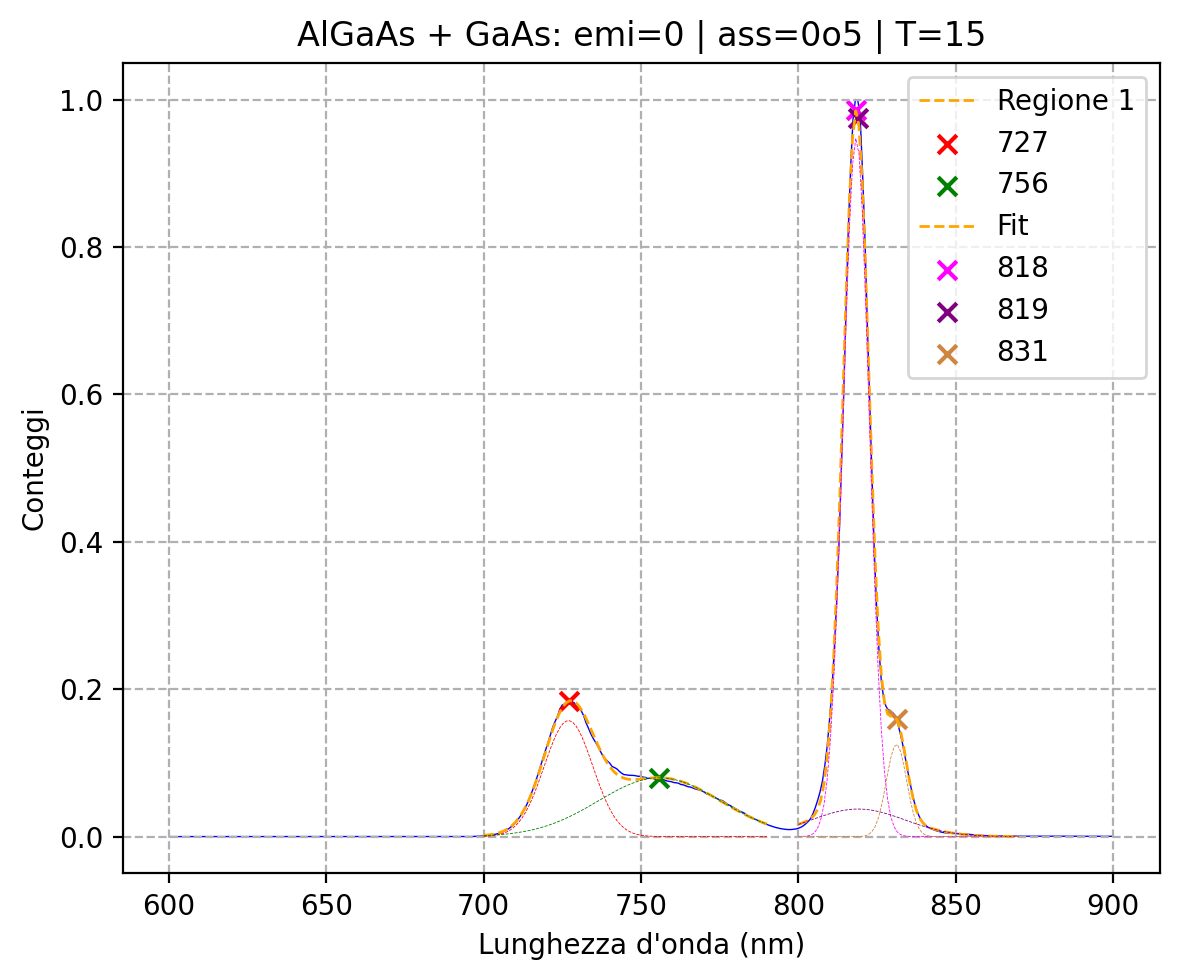

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.12650317695887905
 - mu = 727.9701244614402 | 1.7031628454091507 eV
 - sigma = 7.72105971012556
• Gaussiana  2 [green]
 - A = 0.0852891644275454
 - mu = 756.4839133005883 | 1.6389663372232819 eV
 - sigma = 19.410464018192094
 - chi2rid = 185.6435998076805
• Gaussiana  3 [magenta]
 - A = 0.9011273326174625
 - mu = 818.5408814088613 | 1.5147095236301262 eV
 - sigma = 4.150432993705988
• Gaussiana  4 [purple]
 - A = 0.07245483074485902
 - mu = 819.4391803451487 | 1.5130490441381788 eV
 - sigma = 10.92253106191846
 - chi2rid = 848.6685937190217


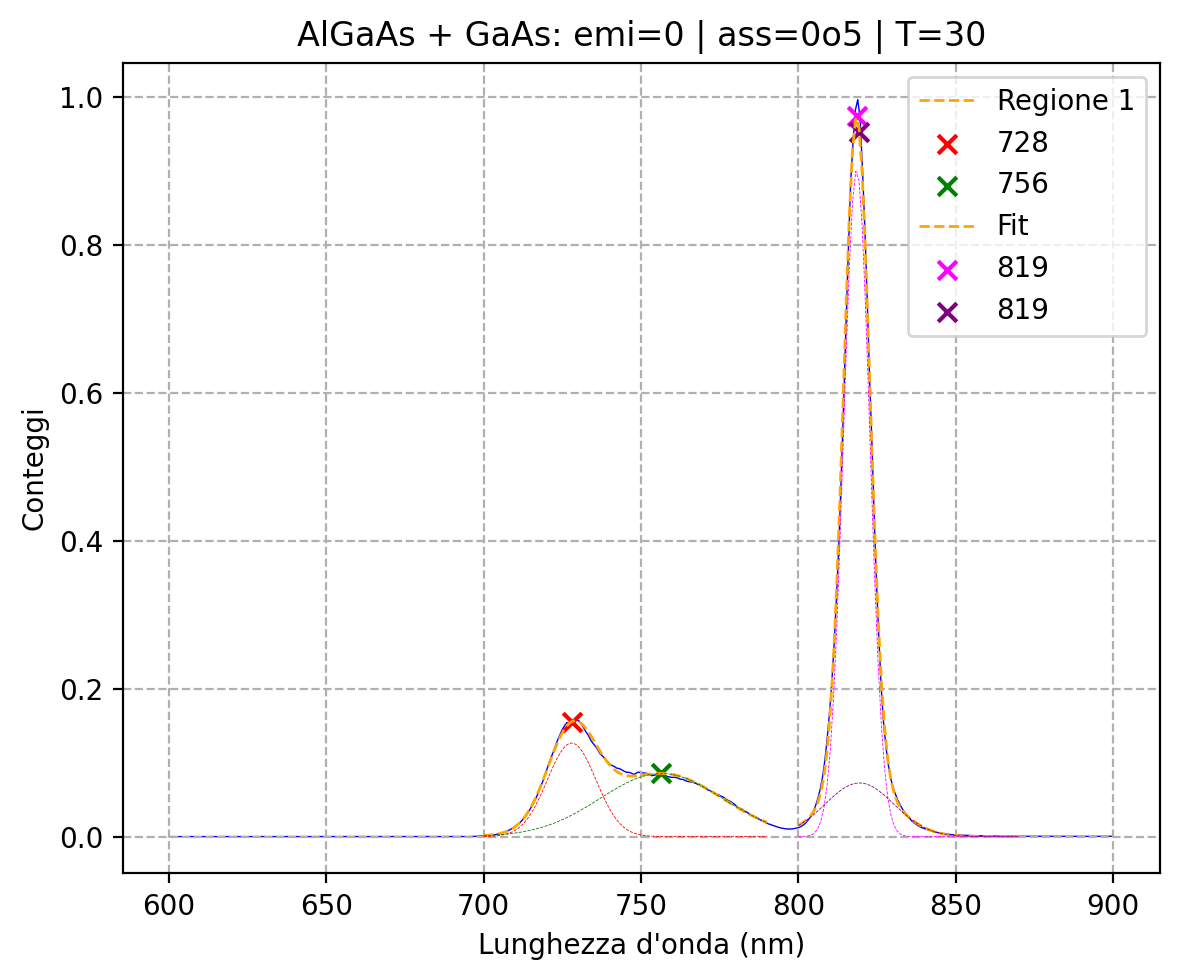

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.06395964654378426
 - mu = 730.0708569575091 | 1.6982621025547395 eV
 - sigma = 7.758669560385633
• Gaussiana  2 [green]
 - A = 0.07237394047039197
 - mu = 758.6808183691554 | 1.634220397473287 eV
 - sigma = 18.834347858099825
 - chi2rid = 122.70545672875475
• Gaussiana  3 [magenta]
 - A = 0.7233548674936938
 - mu = 819.0969643298537 | 1.5136811910479828 eV
 - sigma = 4.272303494618764
• Gaussiana  4 [purple]
 - A = 0.030830548313474673
 - mu = 817.7417044736111 | 1.5161898454826948 eV
 - sigma = 13.2038847268358
 - chi2rid = 698.190661619463


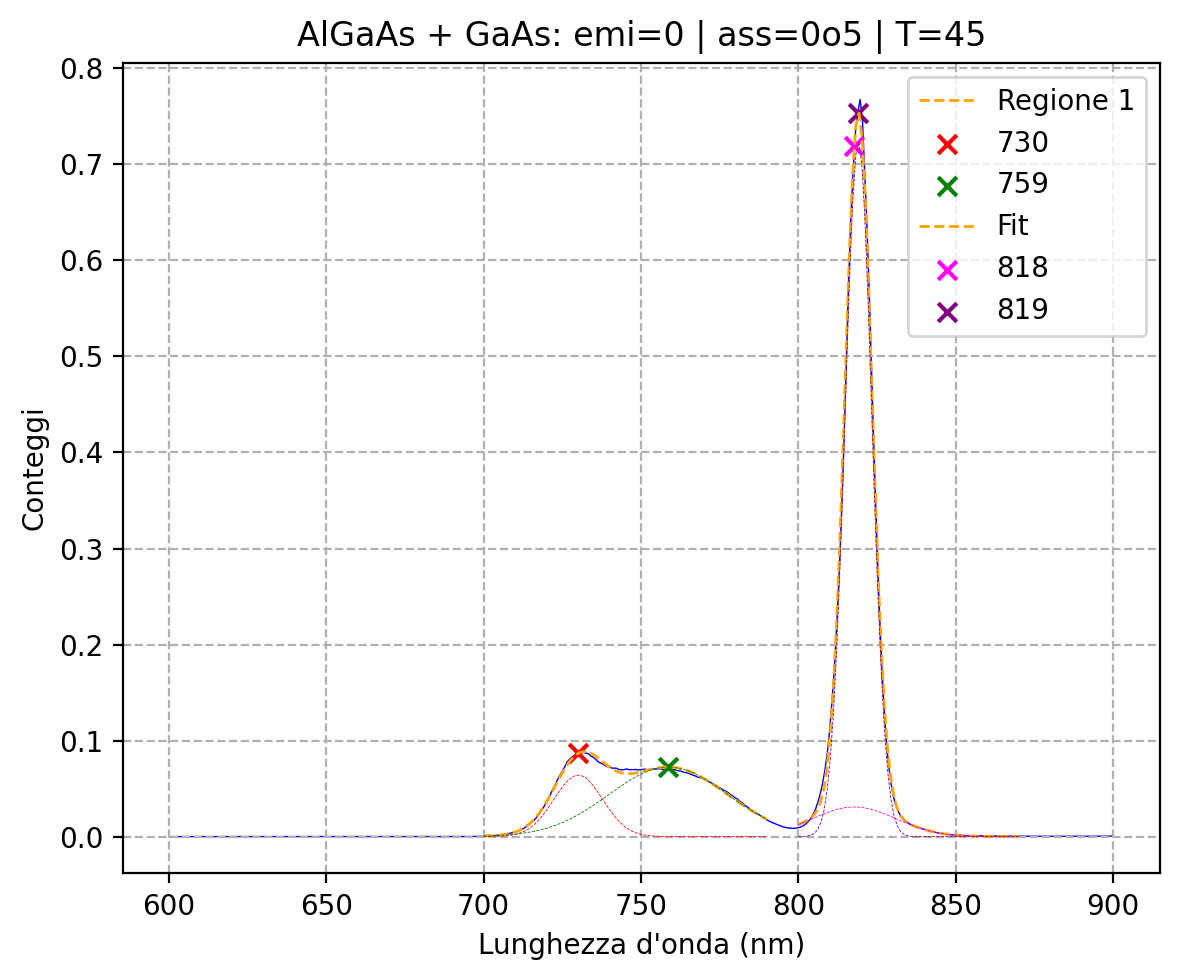

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.05966850262135359
 - mu = 761.64154709284 | 1.6278676935141887 eV
 - sigma = 19.290848218561358
 - chi2rid = 224.52498815298756
• Gaussiana  2 [magenta]
 - A = 0.6880025195653122
 - mu = 820.7196644803997 | 1.5106883899699832 eV
 - sigma = 4.884890668290081
• Gaussiana  3 [purple]
 - A = 0.05111795163252354
 - mu = 817.1374604621886 | 1.5173110138033763 eV
 - sigma = 13.254433232956687
 - chi2rid = 1301.8016595214933


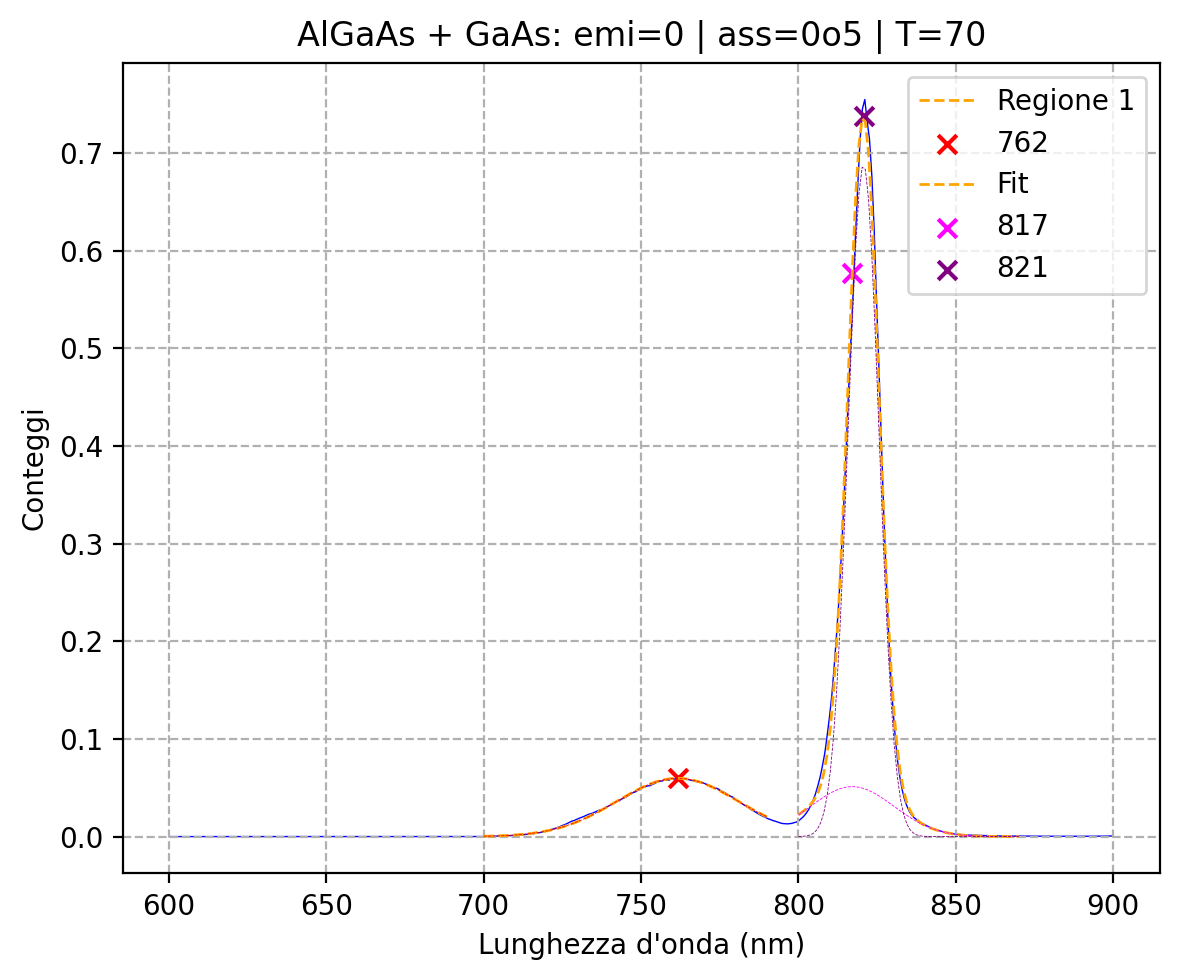

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.019909593070294985
 - mu = 778.921139111795 | 1.5917550651718153 eV
 - sigma = 18.443508149037974
 - chi2rid = 376.55508158116044
• Gaussiana  2 [magenta]
 - A = 0.4336375078847871
 - mu = 824.3795985239275 | 1.5039815041160476 eV
 - sigma = 4.955446304561415
• Gaussiana  3 [purple]
 - A = 0.15470974884836683
 - mu = 820.7437392921261 | 1.5106440770659373 eV
 - sigma = 10.263206292406803
 - chi2rid = 1304.4076468259118


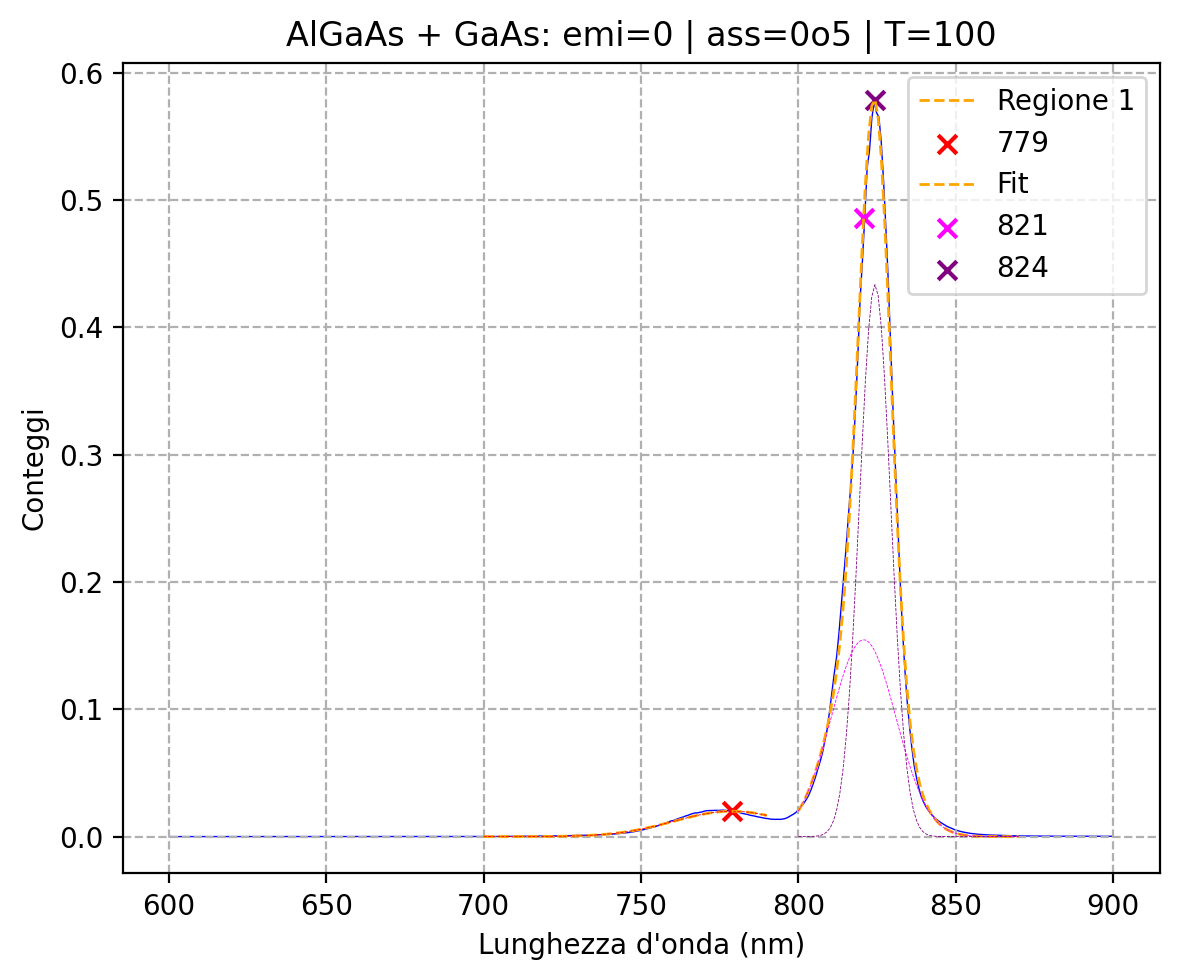

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.21778352251474337
 - mu = 833.3635721650464 | 1.487768016220715 eV
 - sigma = 5.6714557595148305
• Gaussiana  3 [purple]
 - A = 0.1167099980502523
 - mu = 826.6580788046822 | 1.4998361479069808 eV
 - sigma = 12.121727063282508
 - chi2rid = 631.8031012920603


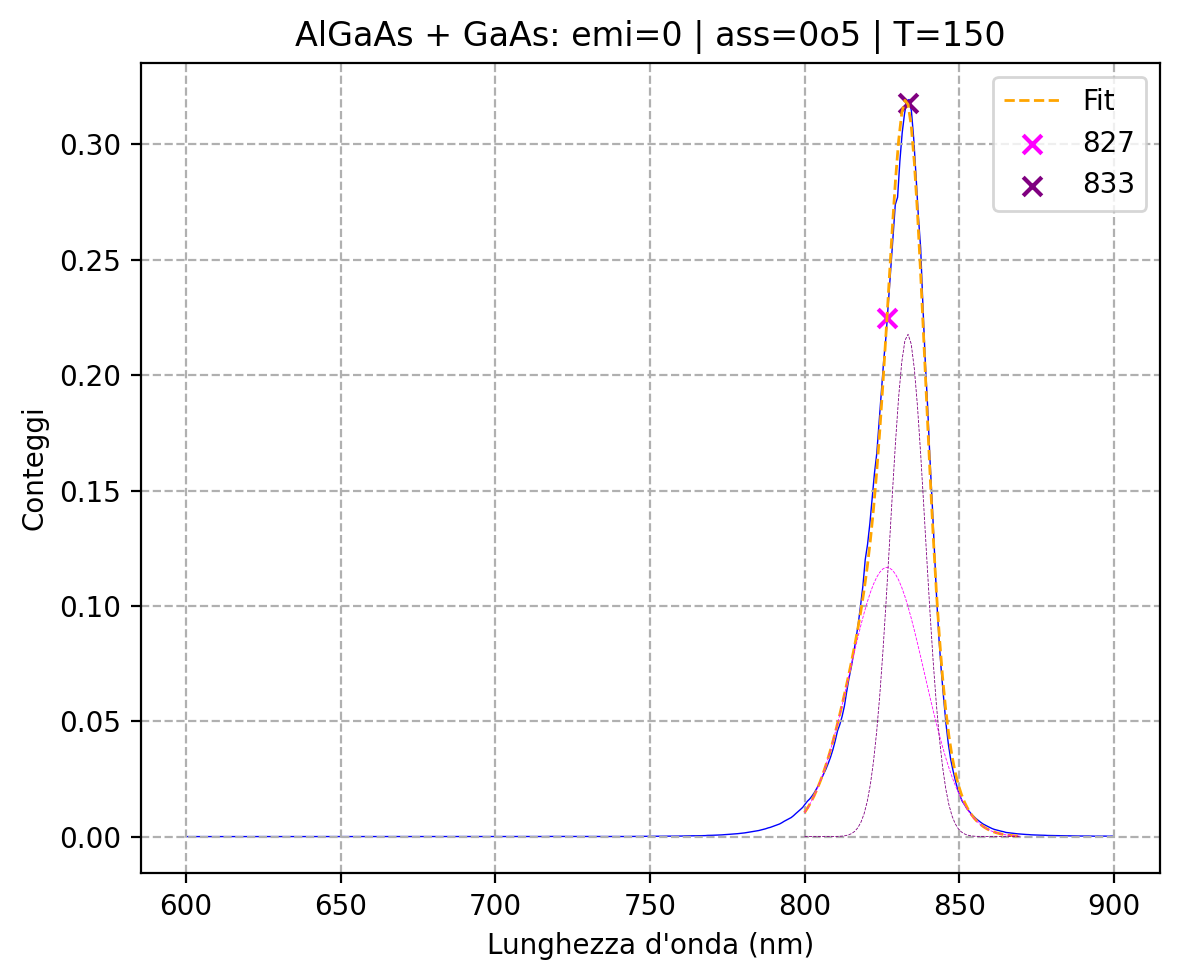

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.03342602067875929
 - mu = 763.8037946061995 | 1.623259372768422 eV
 - sigma = 15.615553070243486
• Gaussiana  2 [green]
 - A = 0.059353806203438775
 - mu = 727.014096221186 | 1.7054025155701915 eV
 - sigma = 7.392850213517799
 - chi2rid = 48.52077199323864
• Gaussiana  3 [magenta]
 - A = 0.30353056155627073
 - mu = 818.5889883675992 | 1.5146205069568157 eV
 - sigma = 3.6064838809534825
• Gaussiana  4 [purple]
 - A = 0.039038686620077444
 - mu = 830.8692368095524 | 1.4922344138188286 eV
 - sigma = 3.439643291170422
• Gaussiana  5 [peru]
 - A = 0.007577931969709207
 - mu = 821.5902592755635 | 1.509087595127817 eV
 - sigma = 15.254902395803551
 - chi2rid = 131.10776762357187


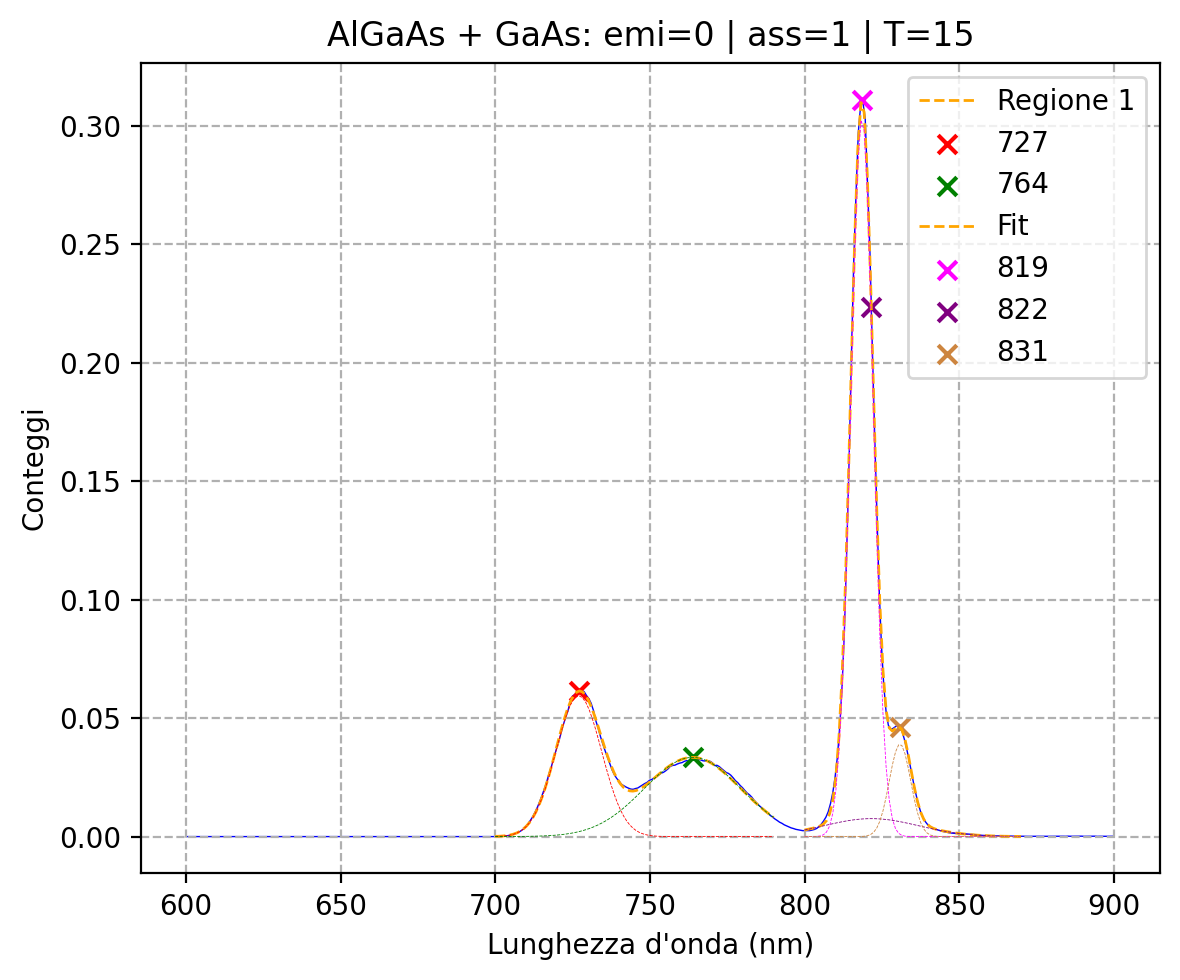

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.03905678150613745
 - mu = 763.1337061145771 | 1.6246847159499573 eV
 - sigma = 16.06683815104122
• Gaussiana  2 [green]
 - A = 0.04860742989036659
 - mu = 728.3291074791239 | 1.702323380761132 eV
 - sigma = 7.402249765278421
 - chi2rid = 65.9265581543097
• Gaussiana  3 [magenta]
 - A = 0.3286272075602955
 - mu = 818.7682384719787 | 1.5142889163171076 eV
 - sigma = 3.674963343429424
• Gaussiana  4 [purple]
 - A = 0.01795522668808834
 - mu = 820.7650638179398 | 1.5106048286012586 eV
 - sigma = 10.814893513563174
 - chi2rid = 206.64633002565998


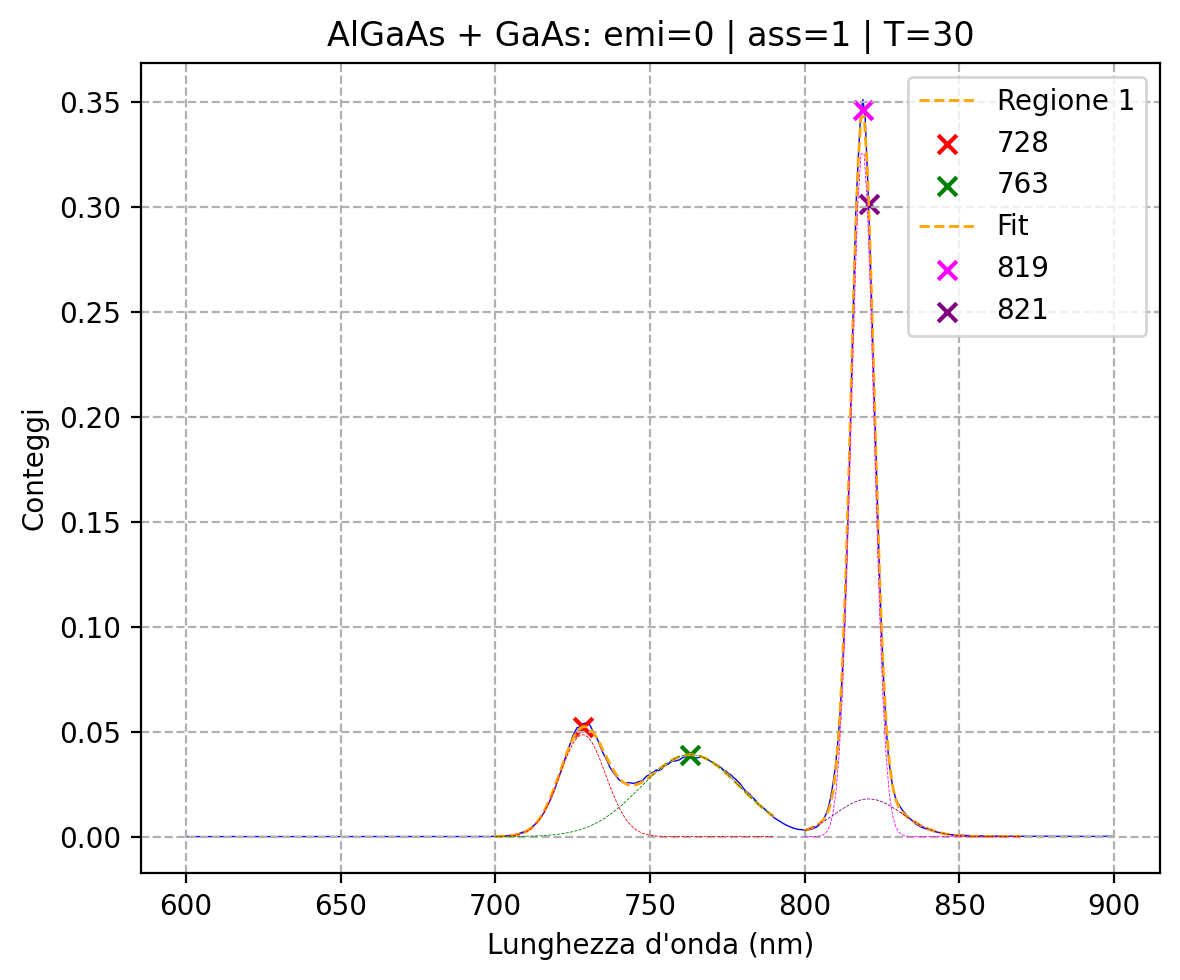

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.03774549256129839
 - mu = 764.0648038348664 | 1.6227048573991938 eV
 - sigma = 15.873582859123033
• Gaussiana  2 [green]
 - A = 0.02279568212392841
 - mu = 730.2780561616429 | 1.6977802606685004 eV
 - sigma = 7.1795141984372775
 - chi2rid = 54.34081733680855
• Gaussiana  3 [magenta]
 - A = 0.28150645741816105
 - mu = 819.2923758622381 | 1.5133201590528138 eV
 - sigma = 3.862291210231104
• Gaussiana  4 [purple]
 - A = 0.00824576838783617
 - mu = 817.7064185094292 | 1.5162552726572525 eV
 - sigma = 13.421105231291994
 - chi2rid = 202.2348920519588


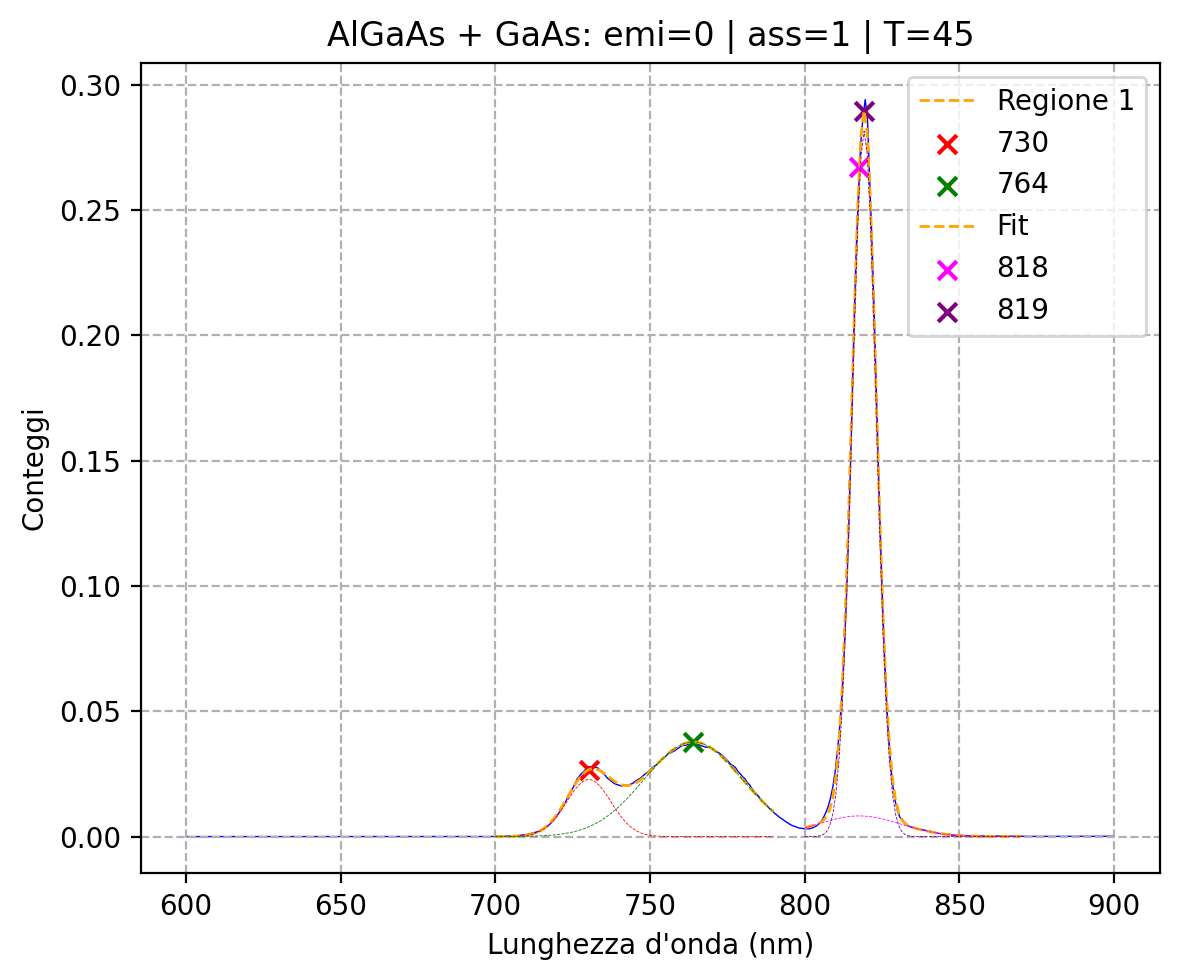

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.026249074821942855
 - mu = 768.9988924935242 | 1.6122931783819712 eV
 - sigma = 15.366127505517445
 - chi2rid = 180.3133462575722
• Gaussiana  2 [magenta]
 - A = 0.2171999603545927
 - mu = 820.9543756731593 | 1.510256483539608 eV
 - sigma = 4.19088379228574
• Gaussiana  3 [purple]
 - A = 0.01768572442935699
 - mu = 817.9255449143438 | 1.5158490601738595 eV
 - sigma = 11.155535776274231
 - chi2rid = 463.9855232688952


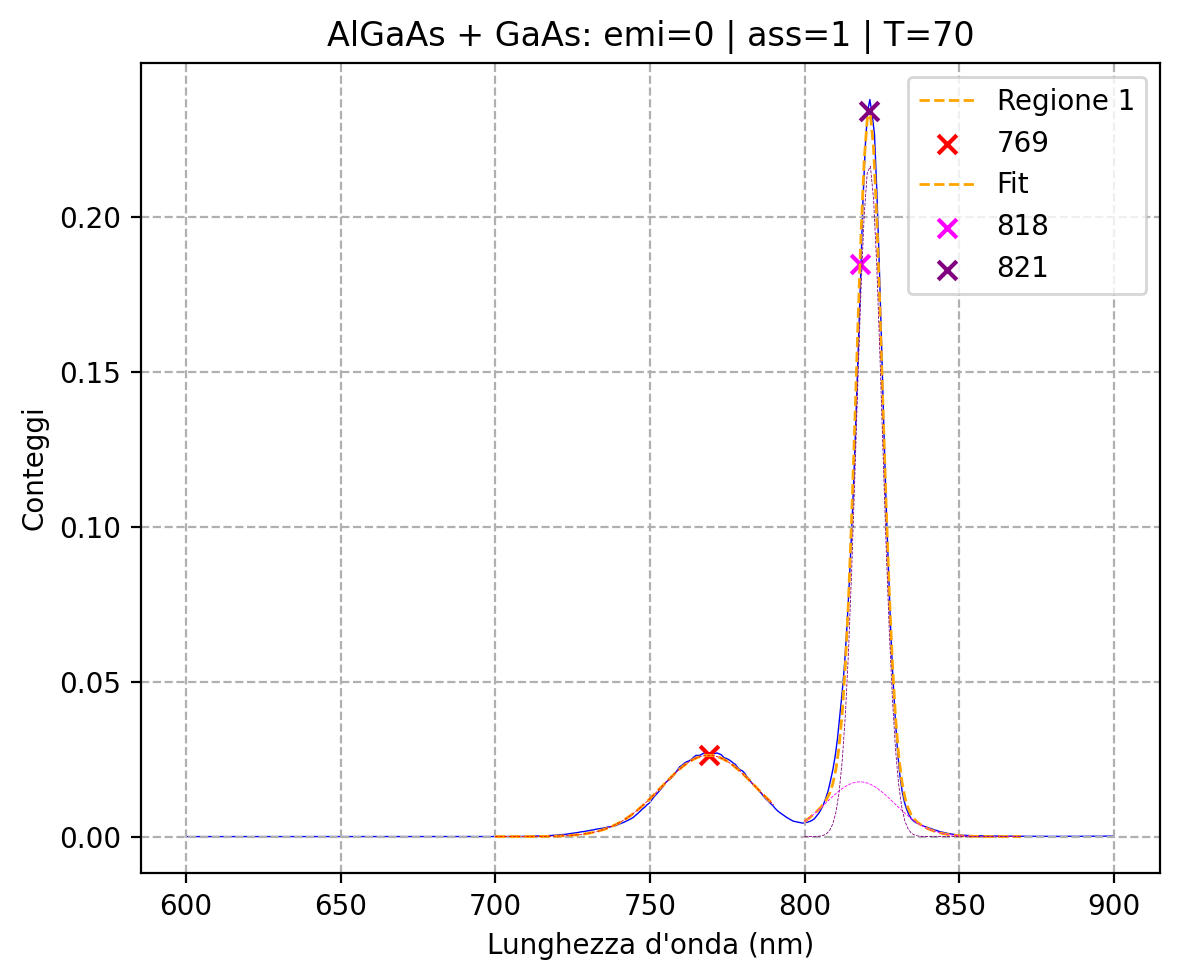

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.008287218322525547
 - mu = 781.376461140112 | 1.5867532875785937 eV
 - sigma = 13.713064621263786
 - chi2rid = 70.3303633411212
• Gaussiana  2 [magenta]
 - A = 0.14740969639686244
 - mu = 824.5850373186772 | 1.5036067991025583 eV
 - sigma = 4.3220750613259815
• Gaussiana  3 [purple]
 - A = 0.04098848555993925
 - mu = 820.6107151057003 | 1.5108889583423226 eV
 - sigma = 9.524835480268784
 - chi2rid = 459.0302509884322


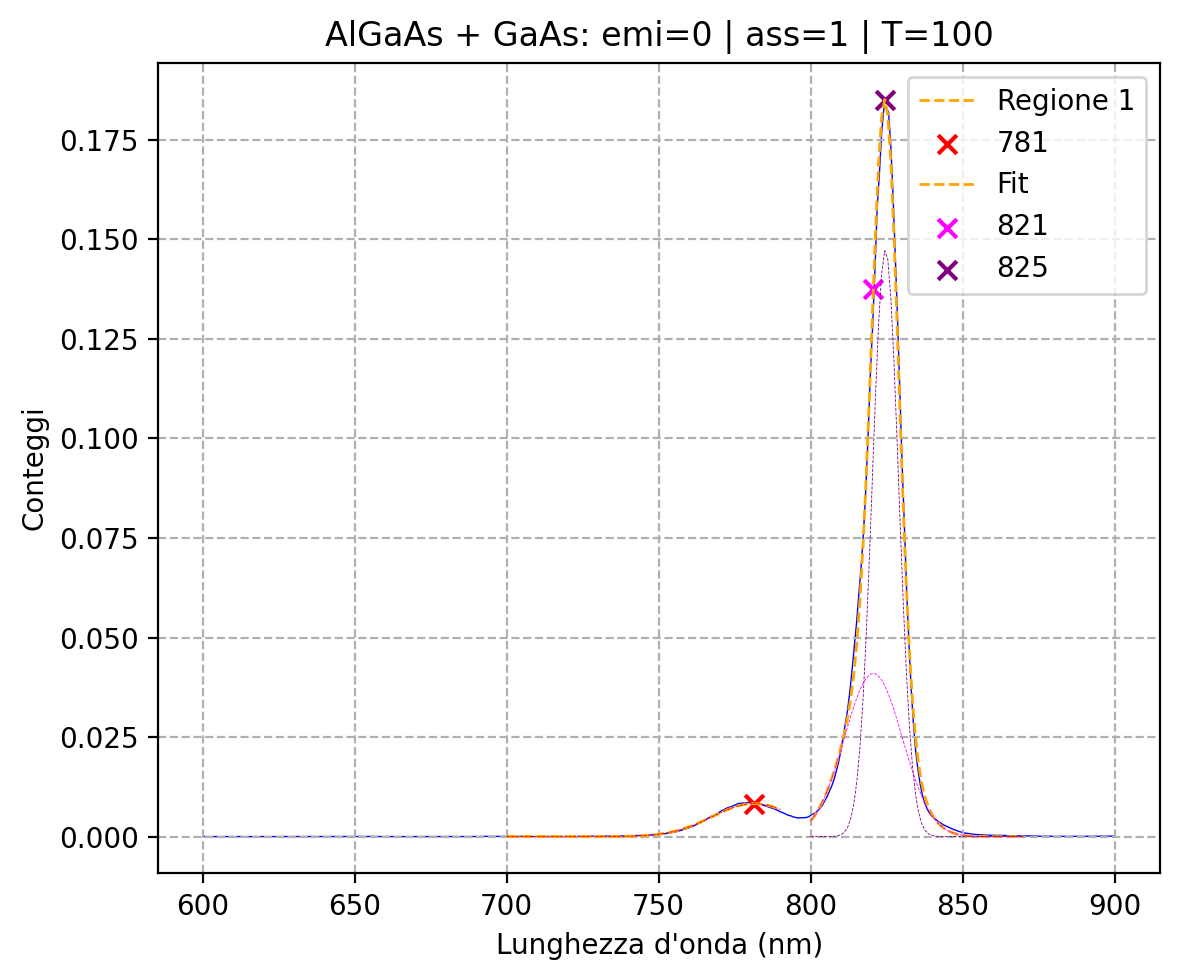

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.08497334628361197
 - mu = 833.3721811696423 | 1.4877526470951568 eV
 - sigma = 5.154599507059519
• Gaussiana  3 [purple]
 - A = 0.03766066863798895
 - mu = 826.6103897879905 | 1.499922676835211 eV
 - sigma = 11.588878376113858
 - chi2rid = 269.651469439983


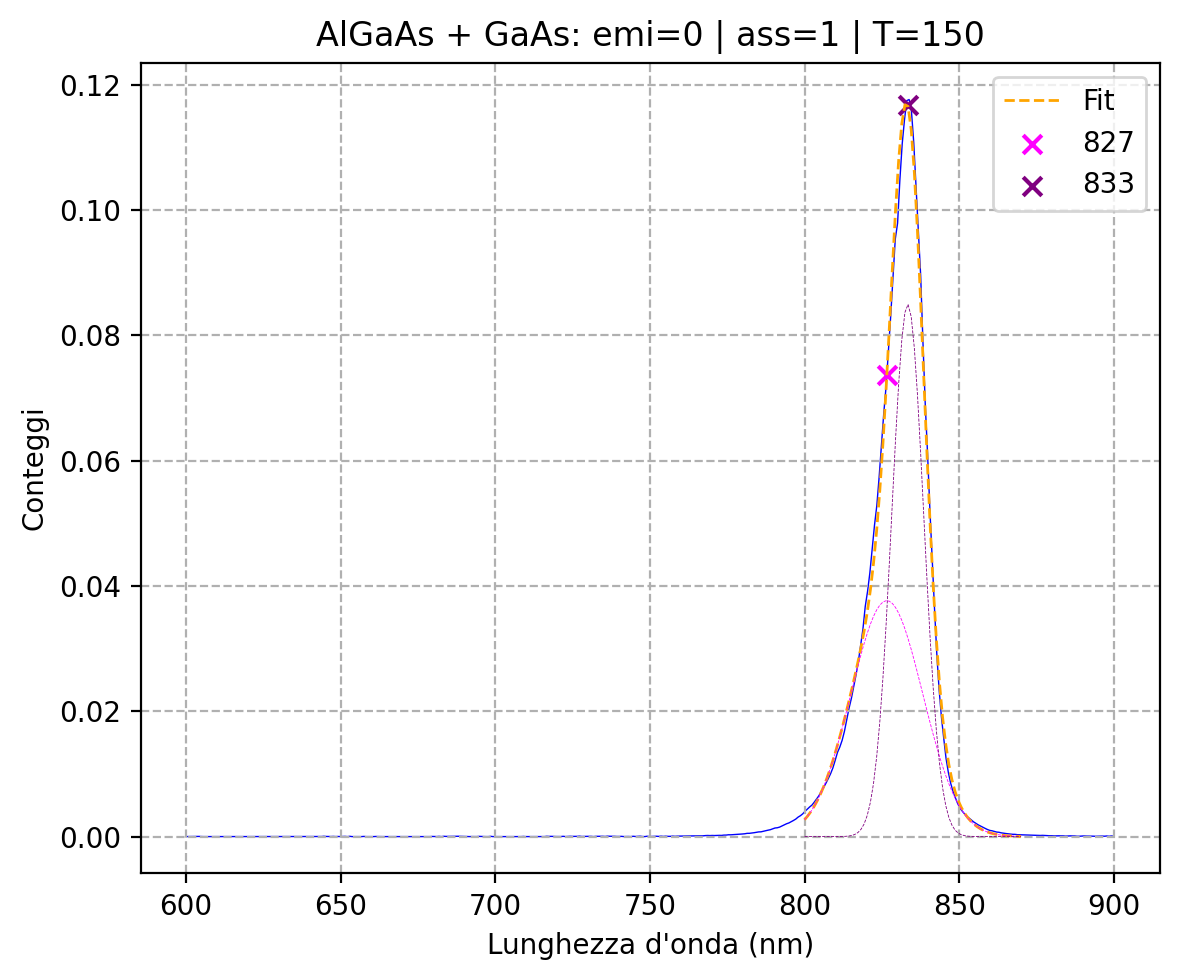

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.011922949797579206
 - mu = 768.3013611959719 | 1.6137569594053458 eV
 - sigma = 14.129252645778156
• Gaussiana  2 [green]
 - A = 0.029135881131819166
 - mu = 727.6632885433952 | 1.7038810230930865 eV
 - sigma = 6.034157731821296
 - chi2rid = 756.9925901894838
• Gaussiana  3 [magenta]
 - A = 0.11196362535587782
 - mu = 818.7378842383831 | 1.514345057702992 eV
 - sigma = 3.335701670707962
• Gaussiana  4 [purple]
 - A = 0.014877058636806545
 - mu = 830.6103585570925 | 1.492699501971571 eV
 - sigma = 3.5620562797039463
• Gaussiana  5 [peru]
 - A = 0.002557182064322178
 - mu = 824.8089496638274 | 1.503198612304018 eV
 - sigma = 14.406462669405299
 - chi2rid = 34.540711606101


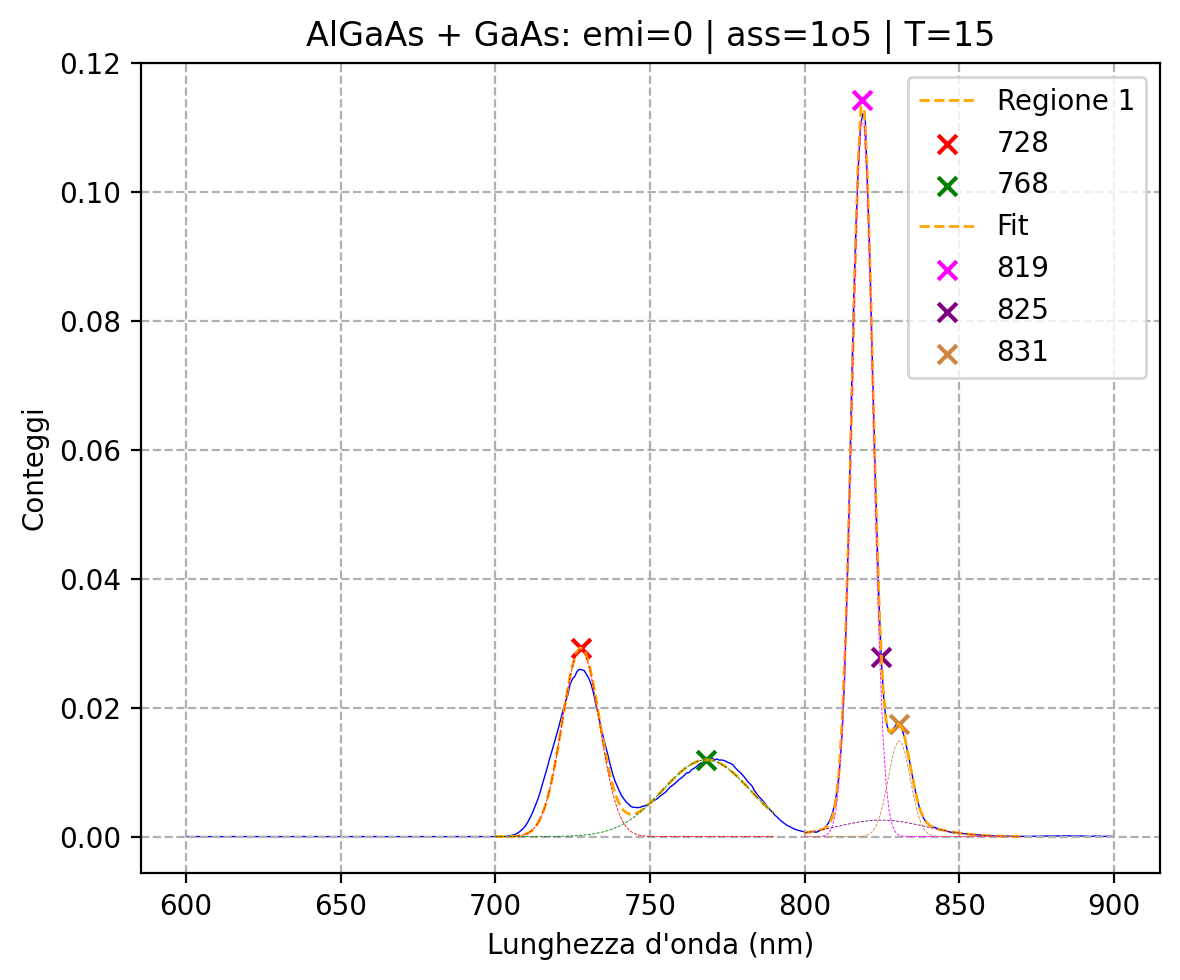

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.013179079918885141
 - mu = 769.4195524192693 | 1.61141169944559 eV
 - sigma = 13.185272899031096
• Gaussiana  2 [green]
 - A = 0.016200220770621488
 - mu = 729.6017575284984 | 1.6993540047800268 eV
 - sigma = 7.222977768655313
 - chi2rid = 46.03439137477225
• Gaussiana  3 [magenta]
 - A = 0.09845396423409385
 - mu = 818.8676077659433 | 1.5141051578938343 eV
 - sigma = 3.4481556710068473
• Gaussiana  4 [purple]
 - A = 0.0031711015151492565
 - mu = 822.1908314552818 | 1.507985276795238 eV
 - sigma = 11.947847550568497
 - chi2rid = 46.33057025818735


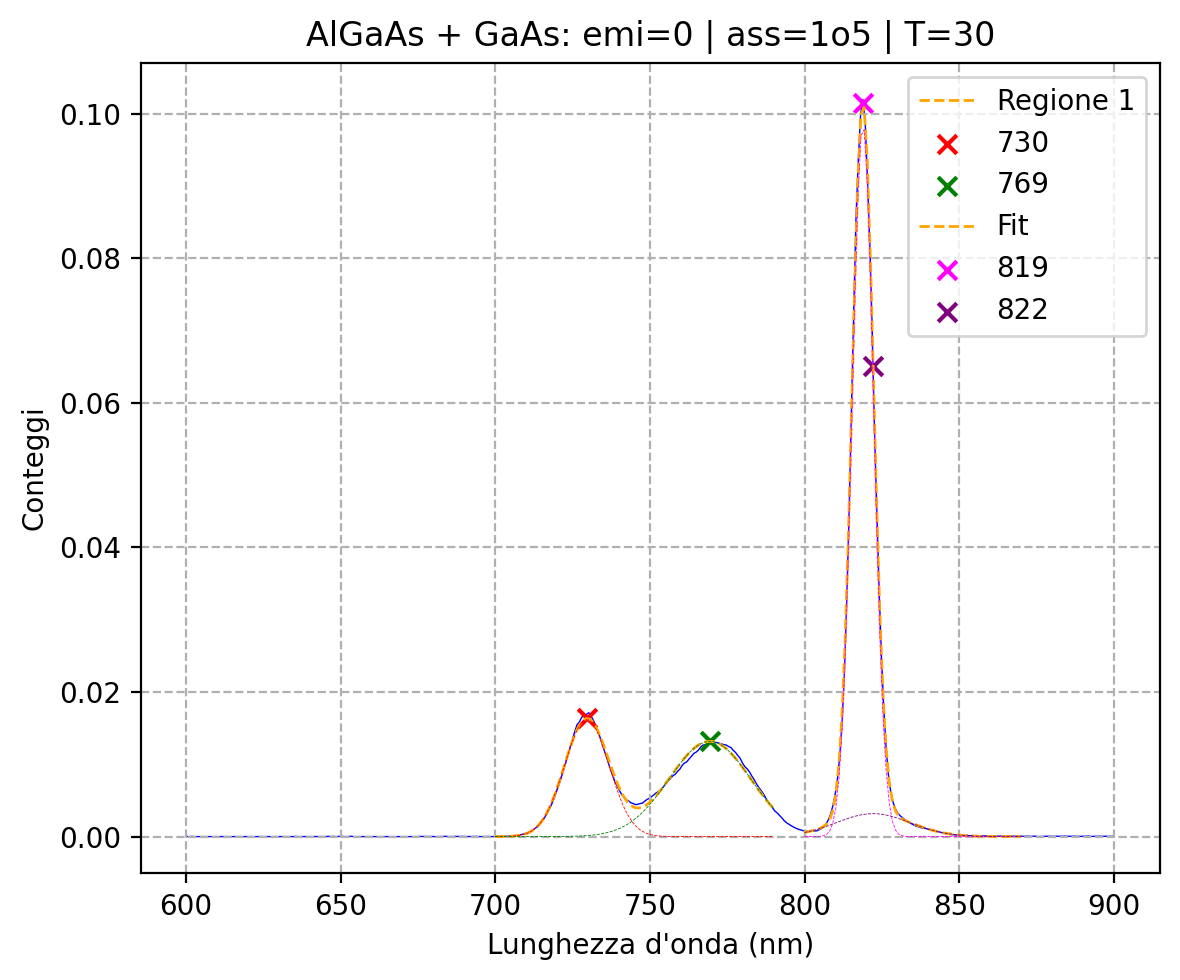

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.014533968157634606
 - mu = 770.2367378049038 | 1.6097020665153556 eV
 - sigma = 13.07395172242982
• Gaussiana  2 [green]
 - A = 0.0068886213352804225
 - mu = 732.6897286908185 | 1.692191960662512 eV
 - sigma = 7.308386554906071
 - chi2rid = 44.78691719489548
• Gaussiana  3 [magenta]
 - A = 0.09138458636963709
 - mu = 819.337227832668 | 1.5132373172280815 eV
 - sigma = 3.6098555287207215
• Gaussiana  4 [purple]
 - A = 0.0020066836621378983
 - mu = 818.1878354473344 | 1.5153631169213435 eV
 - sigma = 14.060752470786632
 - chi2rid = 70.27487865972682


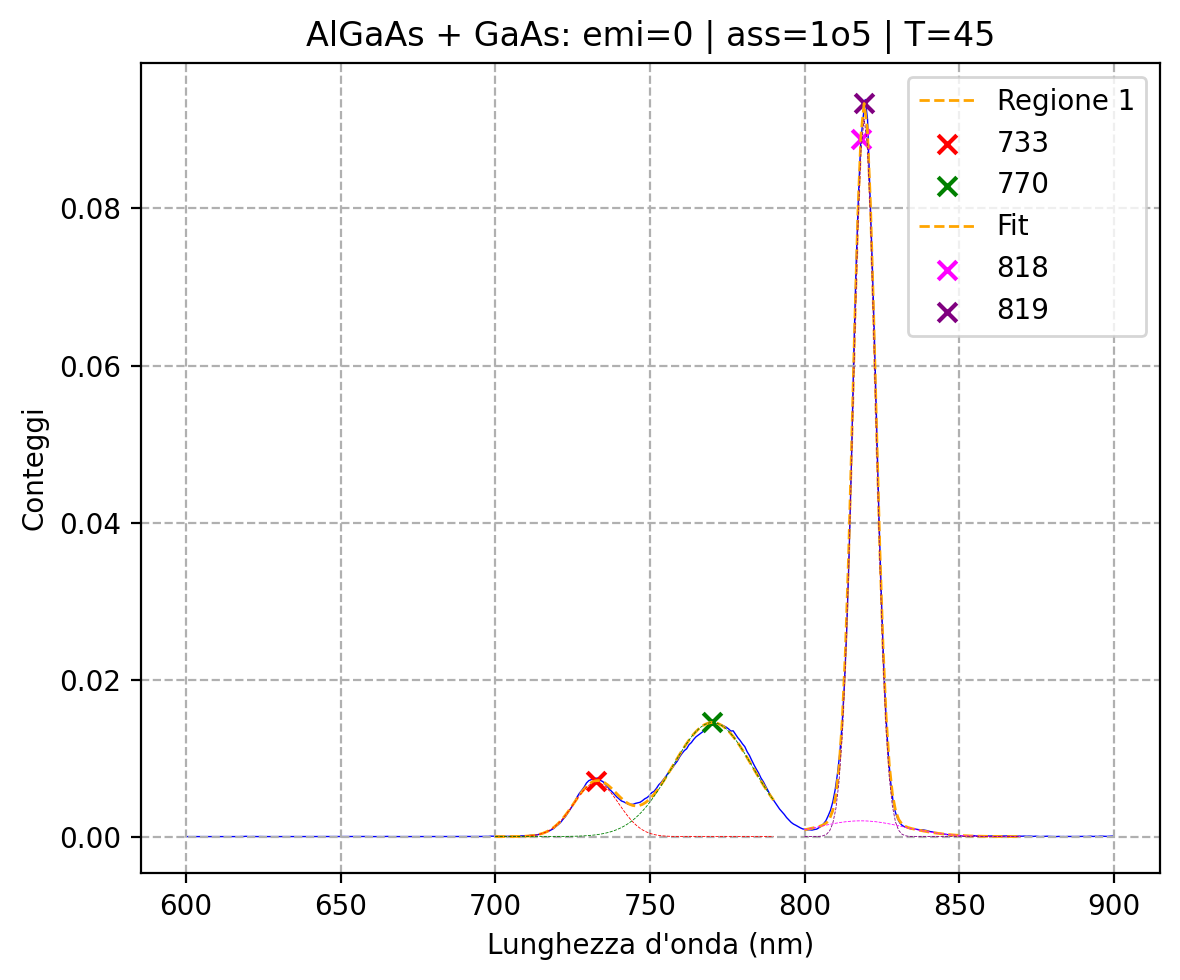

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.011132481368299937
 - mu = 773.4942747634615 | 1.6029228773926645 eV
 - sigma = 13.015156413421174
 - chi2rid = 79.84728005730307
• Gaussiana  2 [magenta]
 - A = 0.0782702335977244
 - mu = 820.9399376099025 | 1.5102830447746562 eV
 - sigma = 3.9540801837152157
• Gaussiana  3 [purple]
 - A = 0.00506940291836042
 - mu = 817.4616275435986 | 1.5167093191594163 eV
 - sigma = 11.62649829547962
 - chi2rid = 185.31831020081802


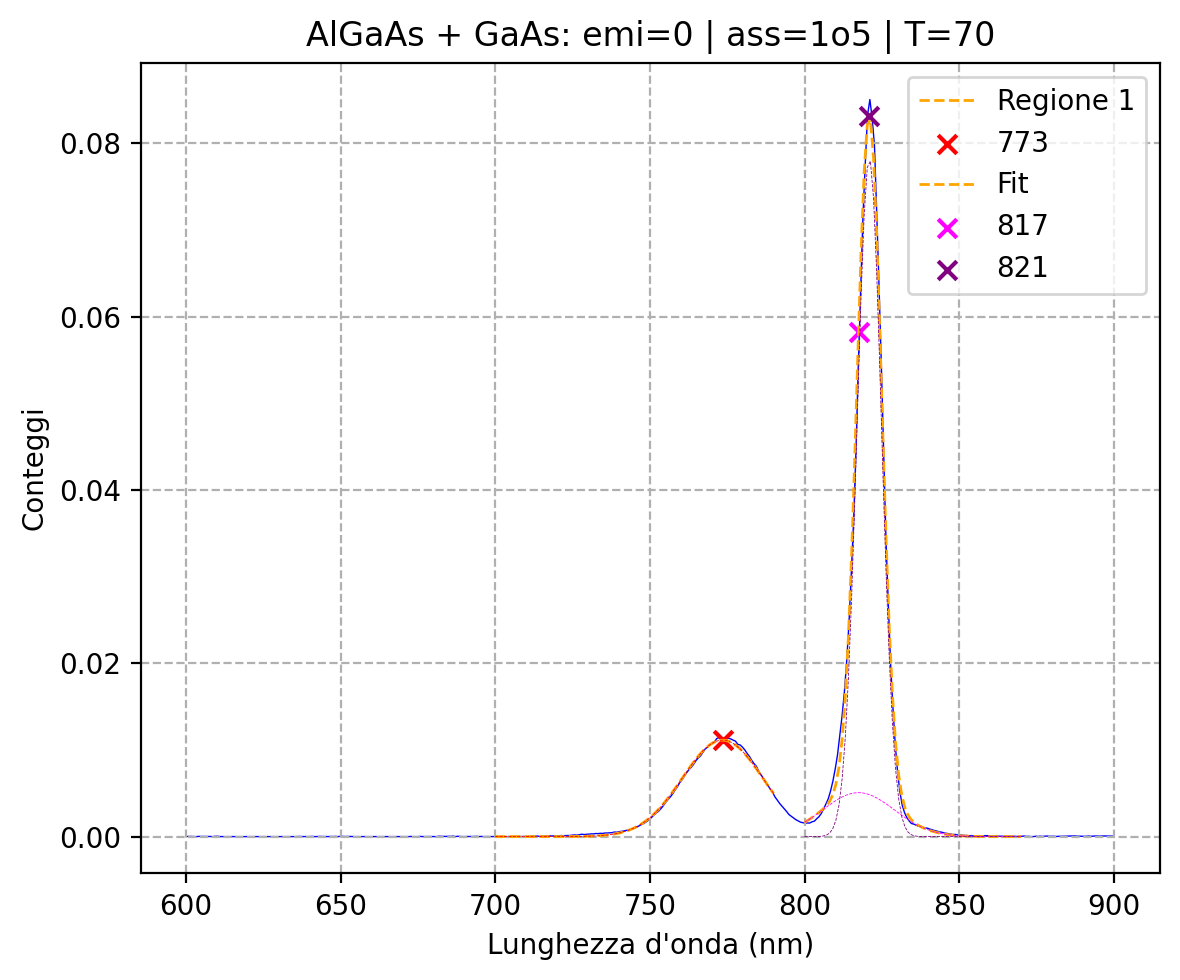

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0021151897113017857
 - mu = 784.5073086284061 | 1.5804208003087894 eV
 - sigma = 11.943857331694907
 - chi2rid = 14.690641477852813
• Gaussiana  2 [magenta]
 - A = 0.040011964170745165
 - mu = 824.5526093213849 | 1.5036659329366628 eV
 - sigma = 3.9634361133037825
• Gaussiana  3 [purple]
 - A = 0.009630395353917609
 - mu = 820.3042383142516 | 1.51145344695345 eV
 - sigma = 9.064572286788687
 - chi2rid = 131.46584669704876


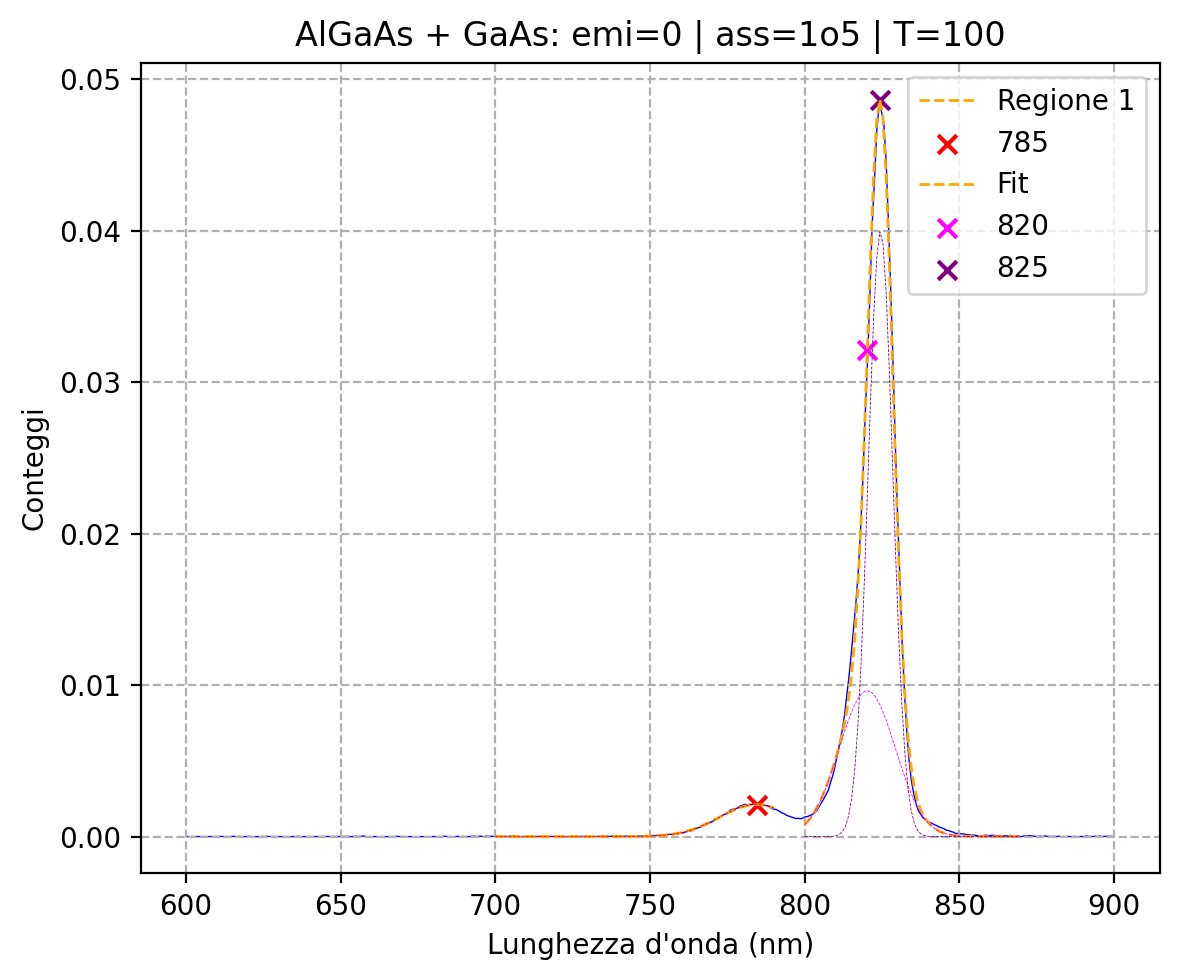

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.018804279643285297
 - mu = 833.342784503969 | 1.4878051284605498 eV
 - sigma = 4.614706818676451
• Gaussiana  3 [purple]
 - A = 0.00689824540449685
 - mu = 826.3683781741519 | 1.5003619466781062 eV
 - sigma = 11.096984774612647
 - chi2rid = 67.36986587635359


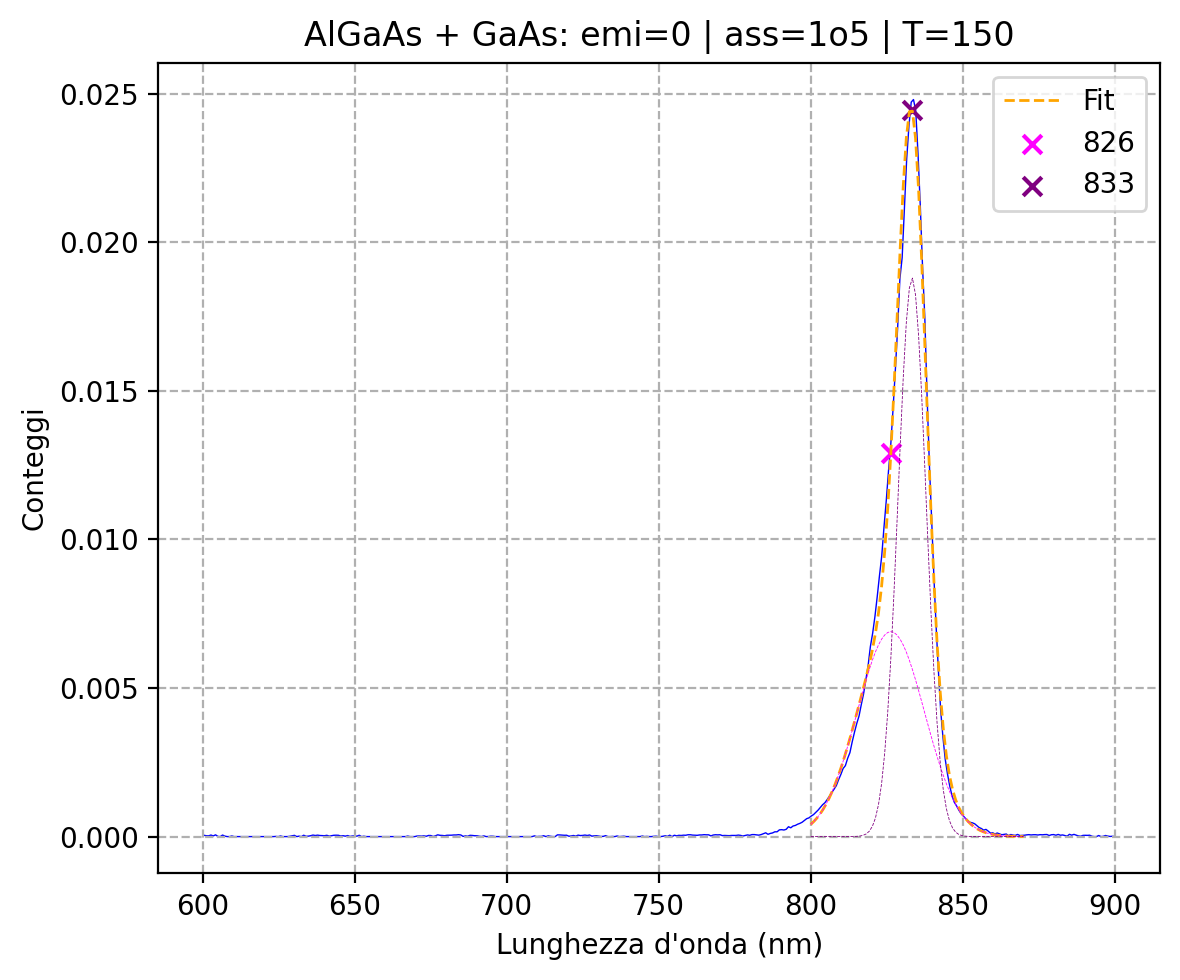

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0037516728170807145
 - mu = 771.4471912531989 | 1.6071763337895992 eV
 - sigma = 12.611009005104947
• Gaussiana  2 [green]
 - A = 0.009901632460901418
 - mu = 727.3981827315732 | 1.7045020155186914 eV
 - sigma = 7.292724637915905
 - chi2rid = 66.67338142914426
• Gaussiana  3 [magenta]
 - A = 0.04014513308061588
 - mu = 818.8771042007426 | 1.5140875989697449 eV
 - sigma = 3.1429301696891474
• Gaussiana  4 [purple]
 - A = 0.005835575592397427
 - mu = 830.3528230565552 | 1.4931624655488813 eV
 - sigma = 3.6740890005568567
• Gaussiana  5 [peru]
 - A = 0.0007927396243225541
 - mu = 828.0737746781098 | 1.4972719900863387 eV
 - sigma = 13.536628946241658
 - chi2rid = 29.070361439288646


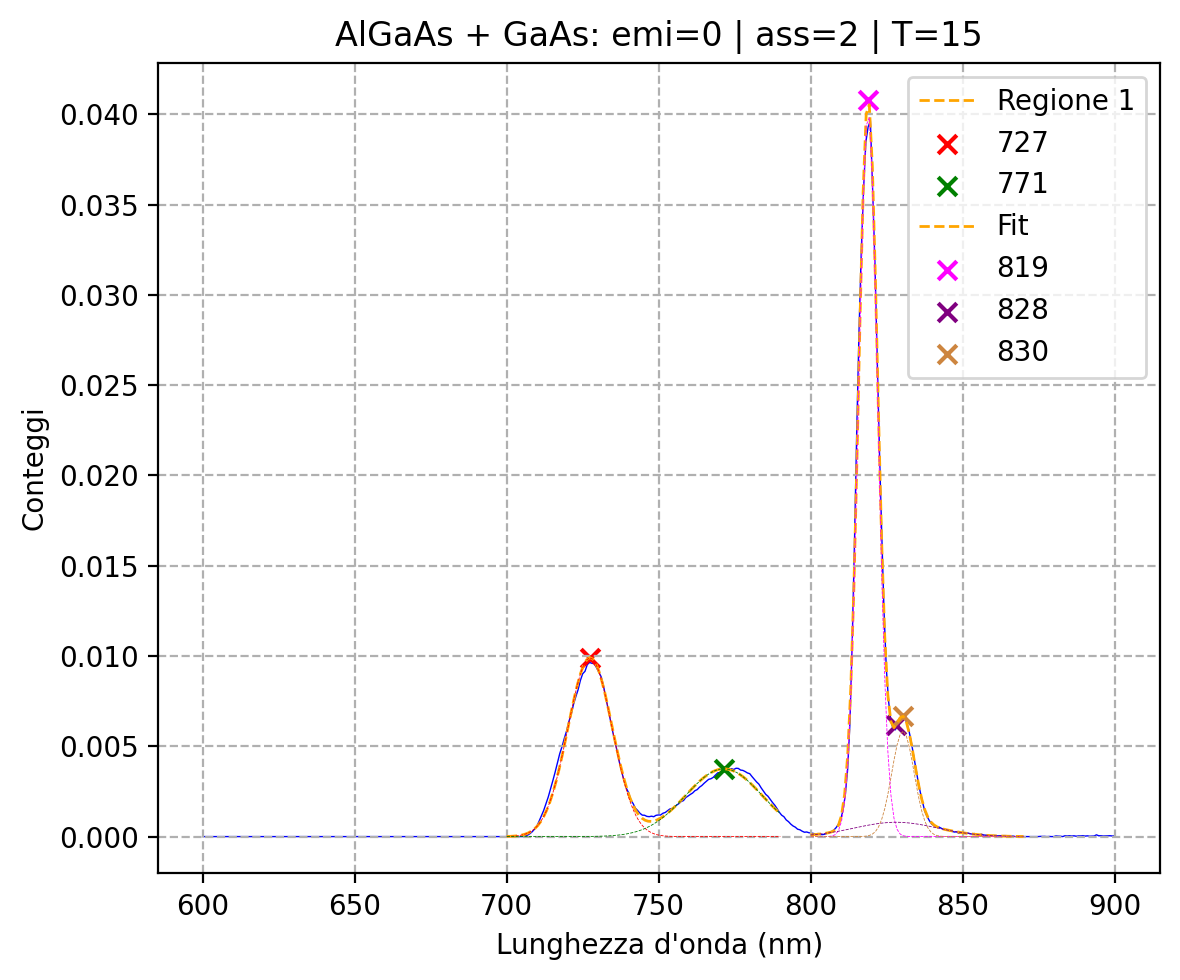

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.004948712640446662
 - mu = 771.6641292016791 | 1.606724508282226 eV
 - sigma = 12.647026517184697
• Gaussiana  2 [green]
 - A = 0.0063890977058578624
 - mu = 730.4544838937007 | 1.6973701933370966 eV
 - sigma = 7.059712341002271
 - chi2rid = 47.648602128953904
• Gaussiana  3 [magenta]
 - A = 0.03856002577831201
 - mu = 818.9490156850616 | 1.513954647730357 eV
 - sigma = 3.333831584674252
• Gaussiana  4 [purple]
 - A = 0.0008883776896331455
 - mu = 823.7484963217146 | 1.5051337563429996 eV
 - sigma = 13.239550194005757
 - chi2rid = 31.925186117318322


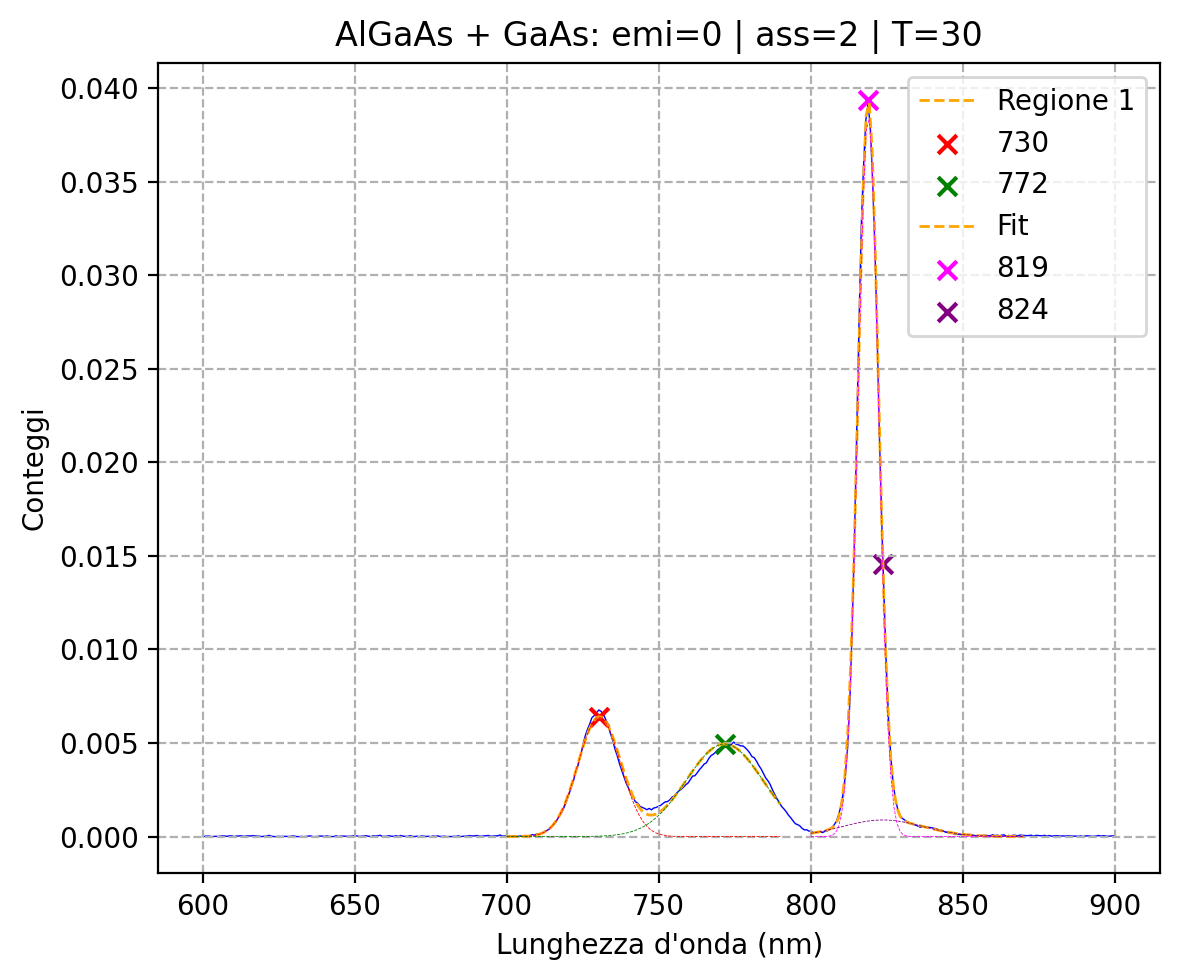

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.004954723050762336
 - mu = 772.5145827832505 | 1.6049556813330388 eV
 - sigma = 12.330918065272972
• Gaussiana  2 [green]
 - A = 0.0018680450162907281
 - mu = 734.72954152739 | 1.687493966791016 eV
 - sigma = 7.5611472753860305
 - chi2rid = 39.34565964165266
• Gaussiana  3 [magenta]
 - A = 0.029684141223957714
 - mu = 819.3340586952737 | 1.513243170343691 eV
 - sigma = 3.477558113110842
• Gaussiana  4 [purple]
 - A = 0.0006819388654401566
 - mu = 819.5343085761575 | 1.5128734155189836 eV
 - sigma = 12.60207223920516
 - chi2rid = 36.67326573859056


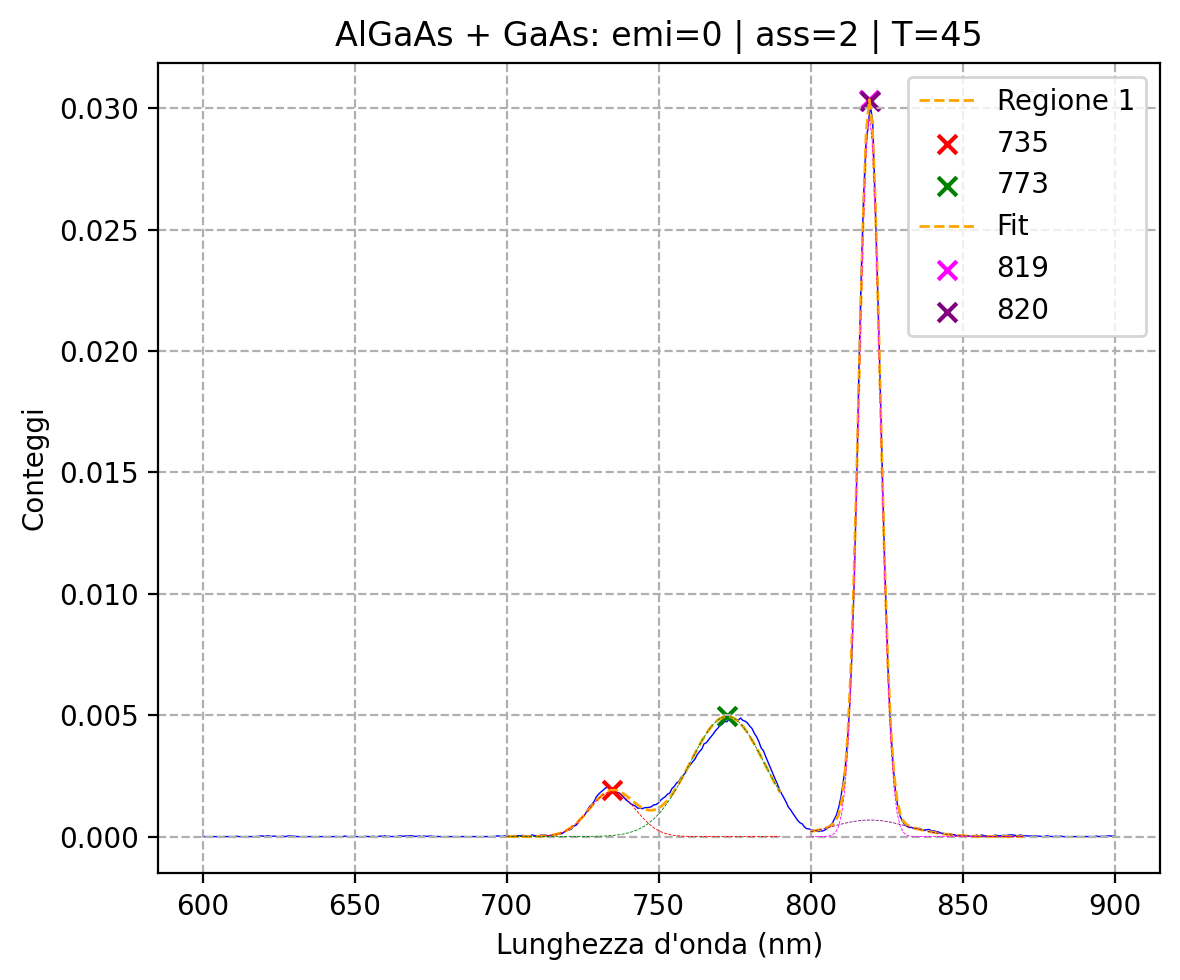

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0026510711804222757
 - mu = 776.2678244038484 | 1.597195748133411 eV
 - sigma = 11.710219383805295
 - chi2rid = 20.072045898918145
• Gaussiana  2 [magenta]
 - A = 0.016948615016428397
 - mu = 820.9228285661158 | 1.510314520935197 eV
 - sigma = 3.7074193380335534
• Gaussiana  3 [purple]
 - A = 0.0013116686892532565
 - mu = 817.9808501308767 | 1.5157465707812403 eV
 - sigma = 10.120594055594028
 - chi2rid = 53.05322269484534


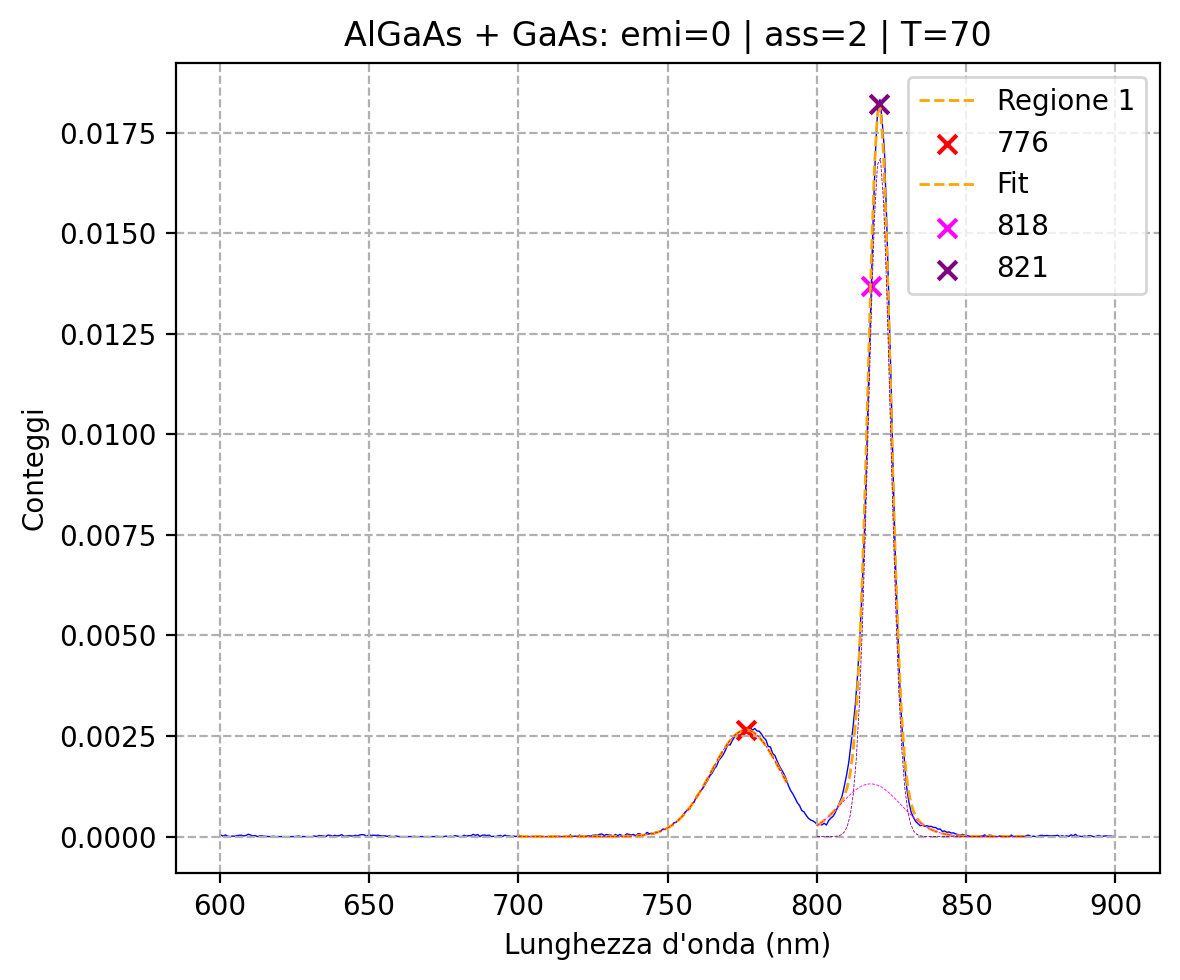

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.000546207676666589
 - mu = 786.4197710223746 | 1.5765774389658938 eV
 - sigma = 12.063538460759796
 - chi2rid = 20.543911215735434
• Gaussiana  2 [magenta]
 - A = 0.012026983919670092
 - mu = 824.5023459129595 | 1.503757599595099 eV
 - sigma = 3.7927733283318426
• Gaussiana  3 [purple]
 - A = 0.0027329195916801223
 - mu = 820.2197152700514 | 1.5116092011301967 eV
 - sigma = 8.902646316637373
 - chi2rid = 48.77877672329755


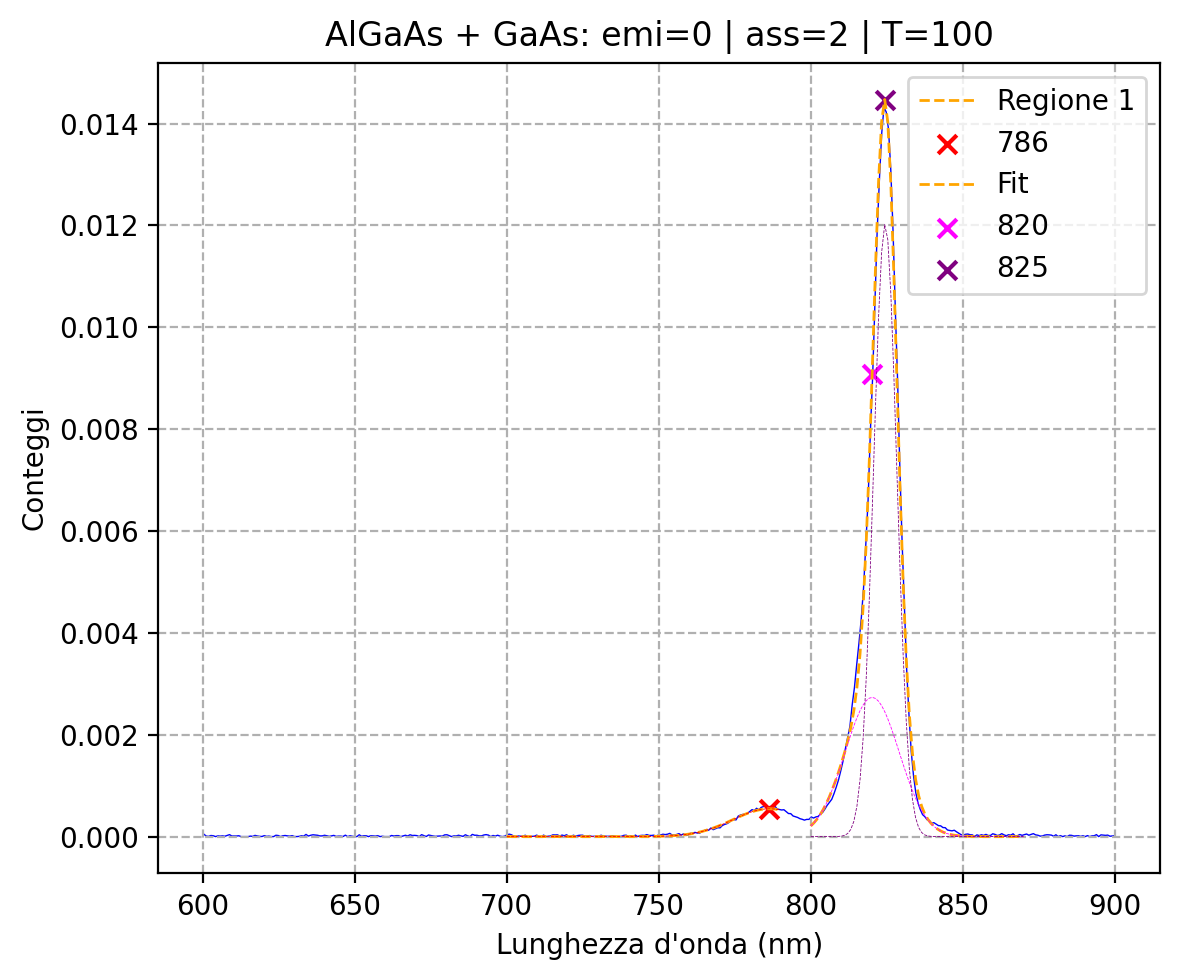

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.0036696799137533598
 - mu = 833.32722340843 | 1.4878329109175452 eV
 - sigma = 4.428903366261412
• Gaussiana  3 [purple]
 - A = 0.0011655848406434486
 - mu = 825.8506115015389 | 1.5013025979315264 eV
 - sigma = 10.749472163151504
 - chi2rid = 18.316481715666807


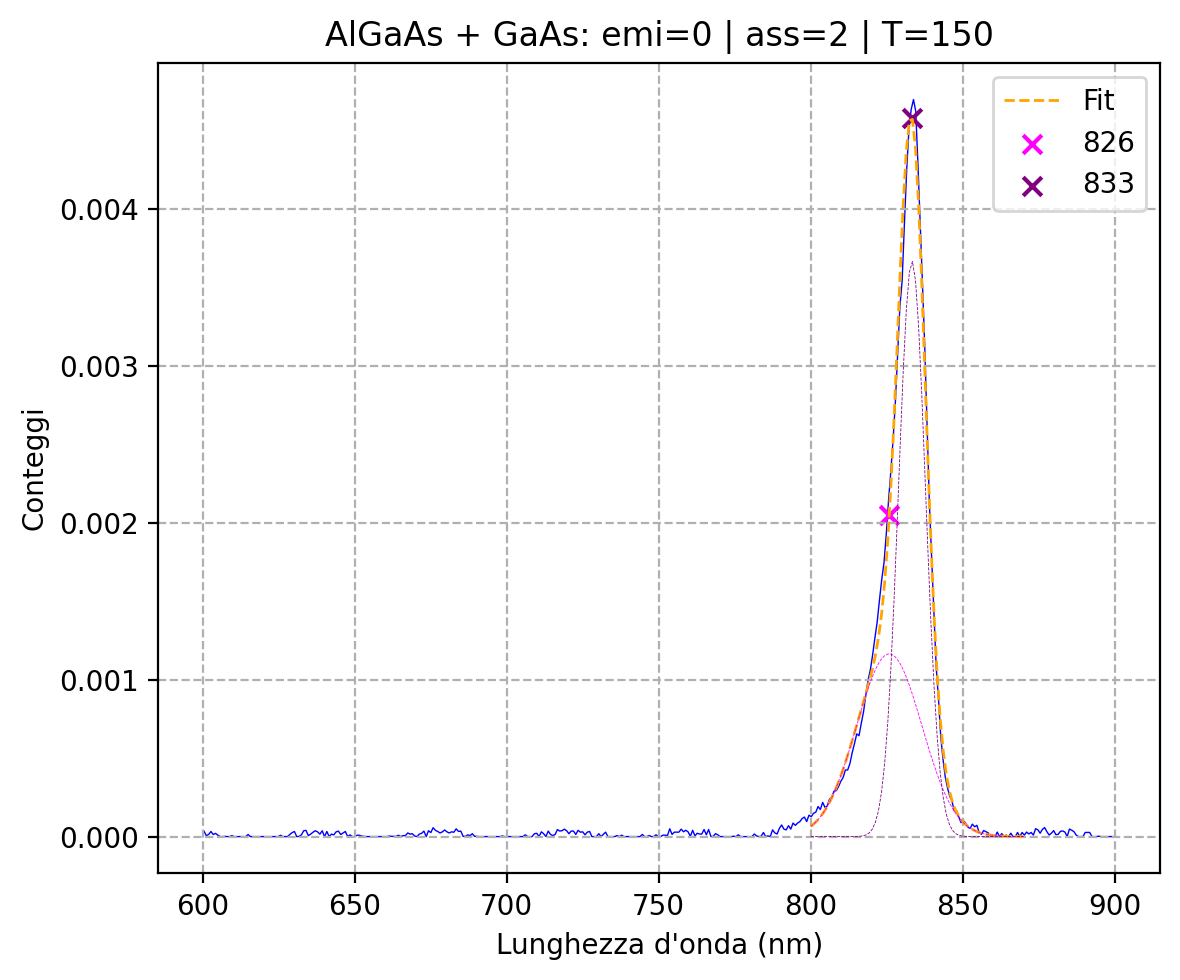

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0006864043532134896
 - mu = 771.3276567954796 | 1.6074254016790055 eV
 - sigma = 12.934943033994154
• Gaussiana  2 [green]
 - A = 0.002329246447581117
 - mu = 727.4764713642332 | 1.704318582600358 eV
 - sigma = 7.044382986163344
 - chi2rid = 13.252964888602376
• Gaussiana  3 [magenta]
 - A = 0.009648729087982082
 - mu = 819.0494623093552 | 1.513768979293106 eV
 - sigma = 2.953929751936045
• Gaussiana  4 [purple]
 - A = 0.0014306082536690013
 - mu = 830.1108588120298 | 1.4935976988964454 eV
 - sigma = 3.6823239303522866
• Gaussiana  5 [peru]
 - A = 0.00035458566776461767
 - mu = 831.0673880272608 | 1.491878620690059 eV
 - sigma = 10.80608969925601
 - chi2rid = 24.606039622140457


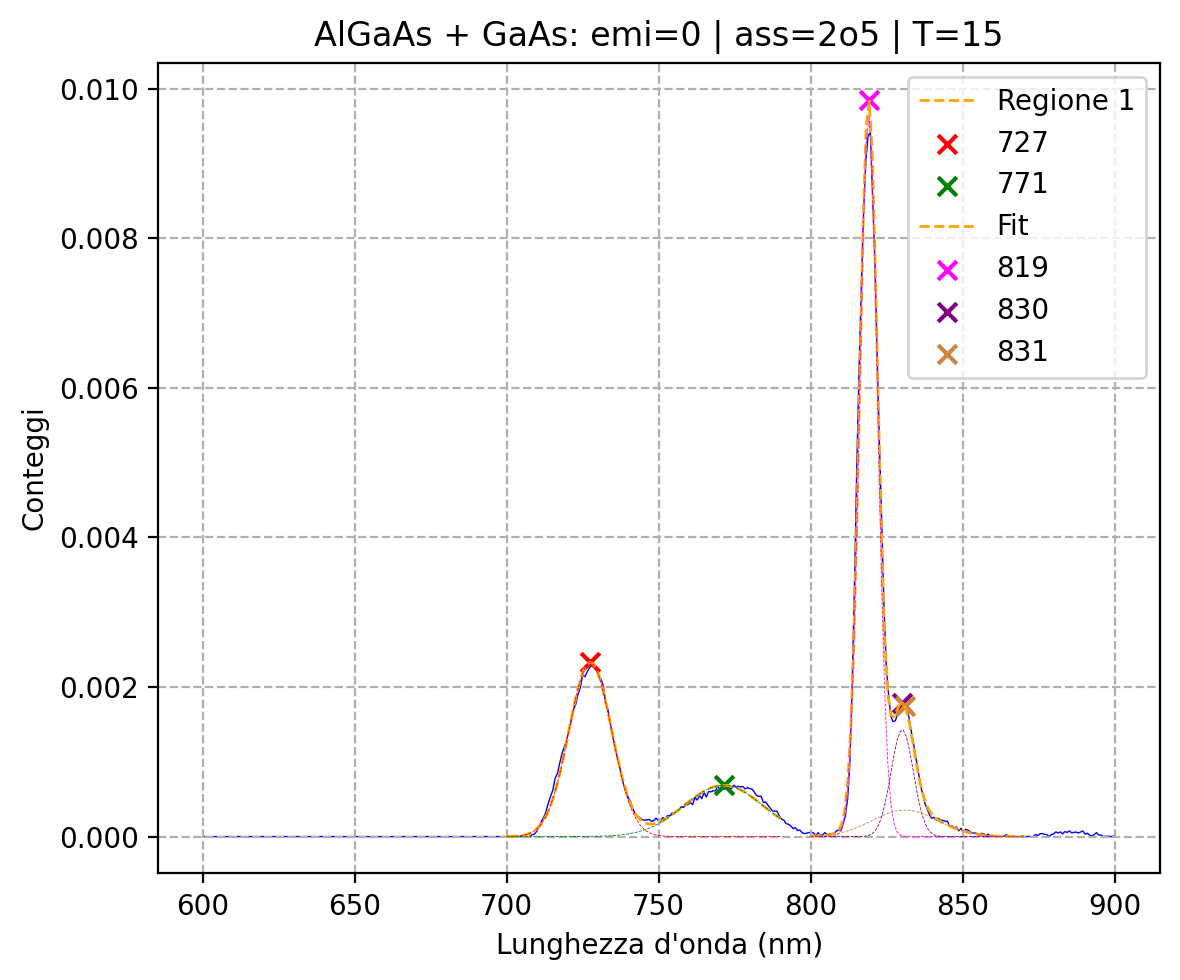

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0012434971969074178
 - mu = 771.5336854238959 | 1.6069961583976735 eV
 - sigma = 12.350153446887726
• Gaussiana  2 [green]
 - A = 0.0015279762183413835
 - mu = 731.904016521444 | 1.694008559268883 eV
 - sigma = 6.446431799119771
 - chi2rid = 27.854141785484902
• Gaussiana  3 [magenta]
 - A = 0.009312738812608887
 - mu = 819.0704899055147 | 1.513730117042338 eV
 - sigma = 3.35432575853285
• Gaussiana  4 [purple]
 - A = 0.0004201178903539089
 - mu = 838.4857539125817 | 1.4786794680352597 eV
 - sigma = 5.507443909215746
 - chi2rid = 28.930676399625582


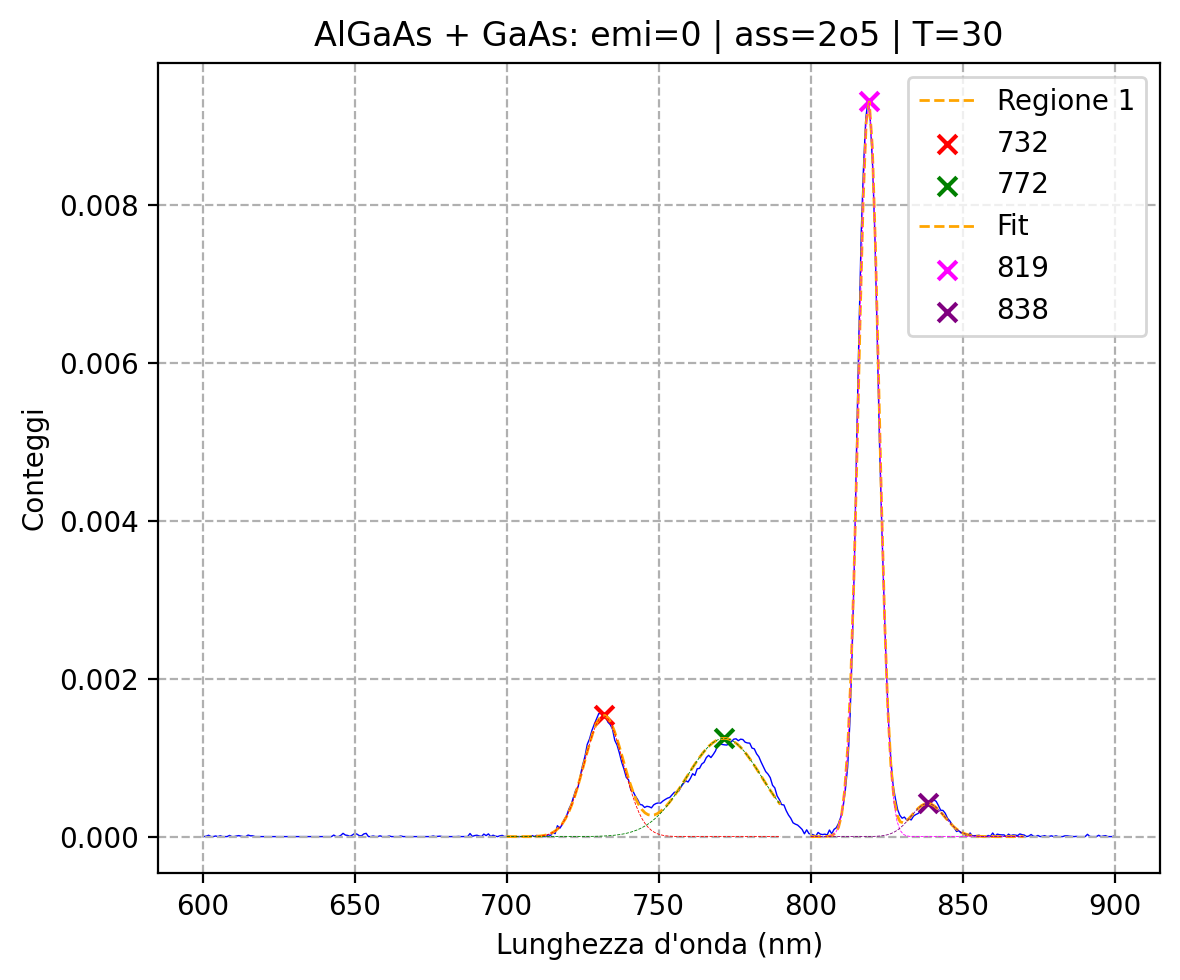

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0013744033281804999
 - mu = 773.2631180265466 | 1.6034020498932358 eV
 - sigma = 11.993215169271522
• Gaussiana  2 [green]
 - A = 0.0003897617614692924
 - mu = 736.9023533051519 | 1.6825182644479577 eV
 - sigma = 7.896120574305618
 - chi2rid = 20.663514995135156
• Gaussiana  3 [magenta]
 - A = 0.0074067422354504924
 - mu = 819.3170527917952 | 1.5132745795121036 eV
 - sigma = 3.4370940662828344
• Gaussiana  4 [purple]
 - A = 0.00014923262337852055
 - mu = 822.5557628366871 | 1.5073162508457971 eV
 - sigma = 15.938068090825027
 - chi2rid = 17.13771973258699


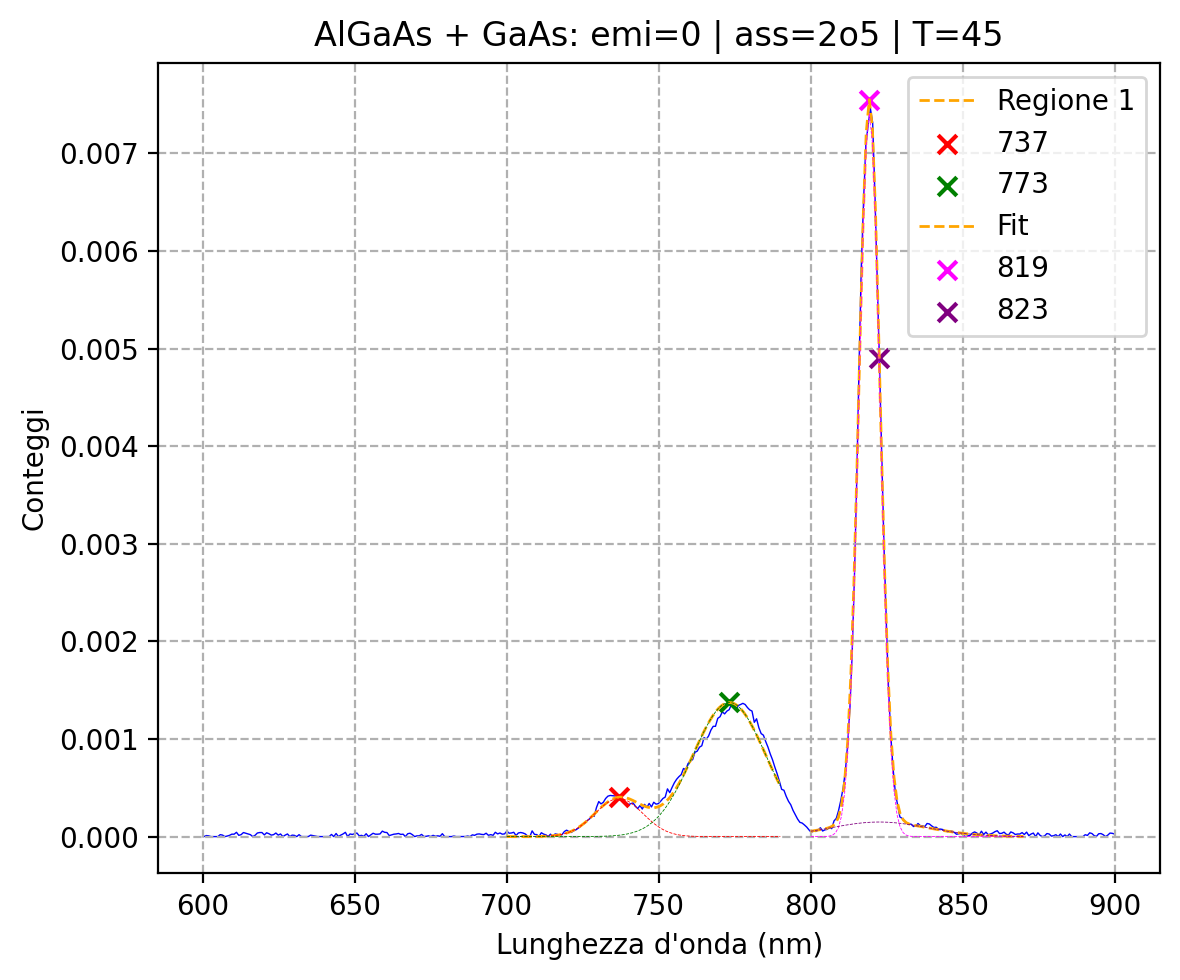

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0008594075579411665
 - mu = 776.9238461057656 | 1.5958471023449758 eV
 - sigma = 10.934763098747169
 - chi2rid = 20.994899833020558
• Gaussiana  2 [magenta]
 - A = 0.004891063948523002
 - mu = 820.7870012613204 | 1.5105644541705632 eV
 - sigma = 3.77150076133036
• Gaussiana  3 [purple]
 - A = 0.00019423530139437624
 - mu = 815.4122896891922 | 1.5205211942822077 eV
 - sigma = 16.692591808277026
 - chi2rid = 25.843978195629184


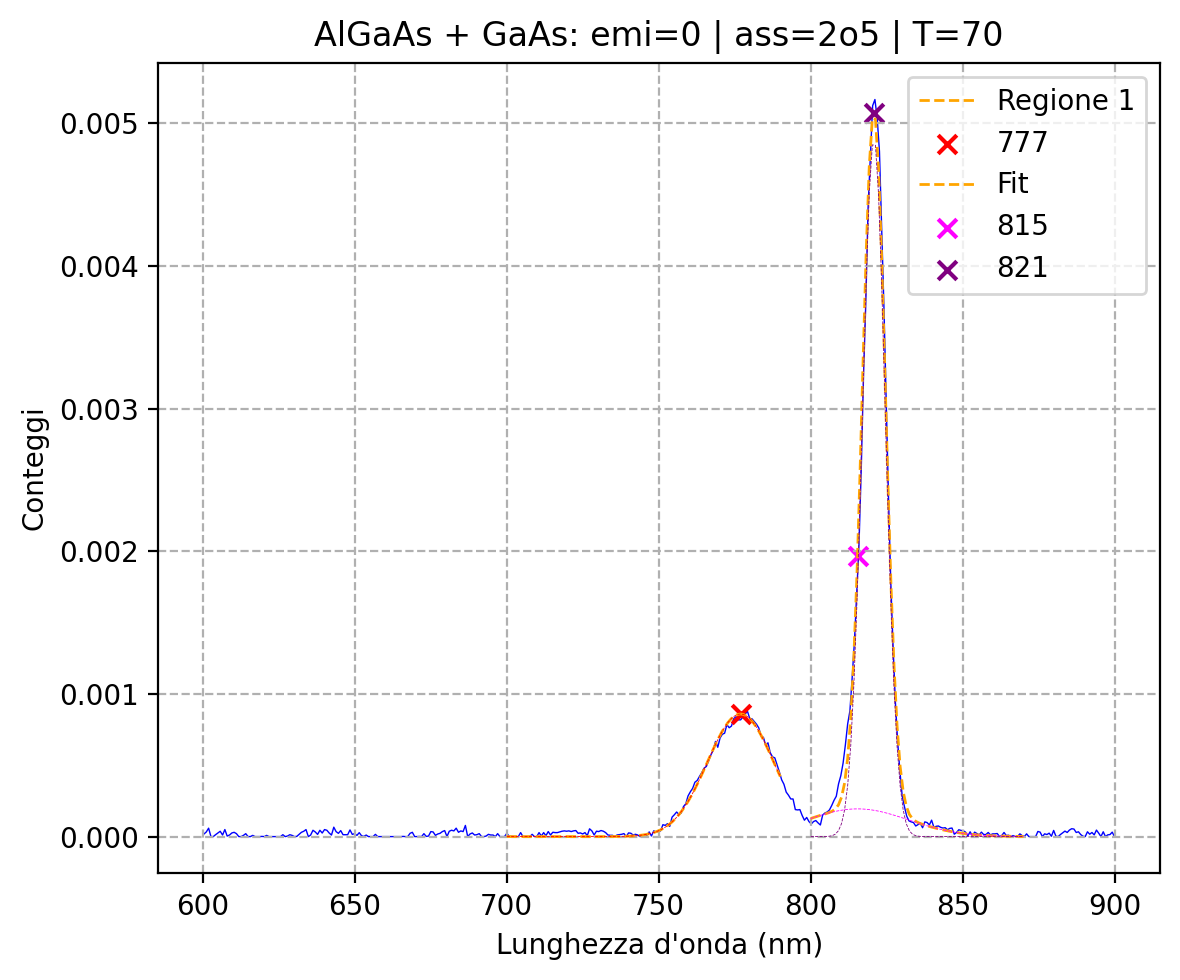

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.00012290799894176617
 - mu = 785.9830299190052 | 1.5774534835419607 eV
 - sigma = 6.991172734557952
 - chi2rid = 21.25111374921002
• Gaussiana  2 [magenta]
 - A = 0.00265312907443063
 - mu = 824.7859140460694 | 1.503240595451472 eV
 - sigma = 3.666458118489861
• Gaussiana  3 [purple]
 - A = 0.0007433706221930819
 - mu = 819.9153070648251 | 1.512170413050446 eV
 - sigma = 6.928208453012086
 - chi2rid = 16.290234406482583


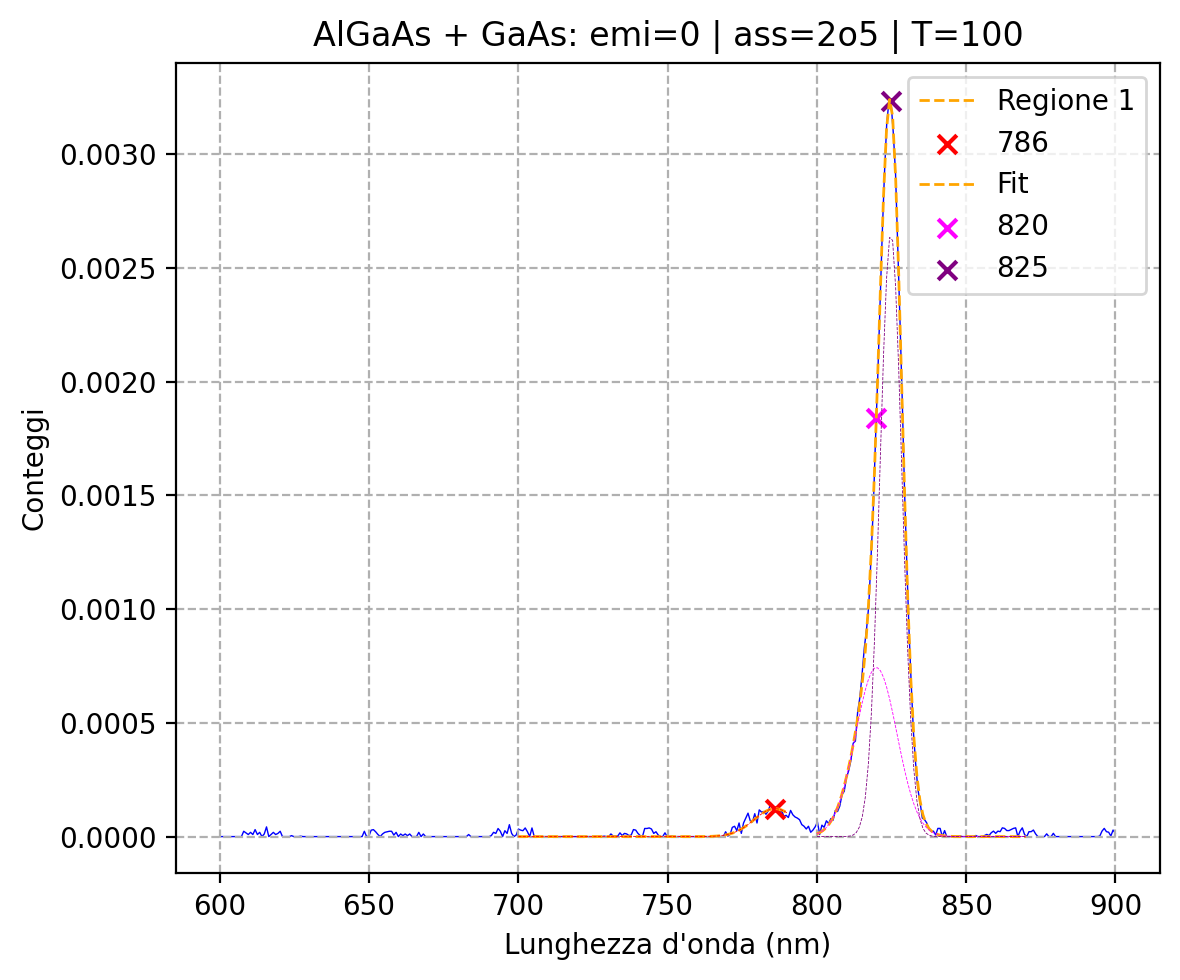

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.000525272029219485
 - mu = 833.7177518730516 | 1.487135983089142 eV
 - sigma = 4.217738596894933
• Gaussiana  3 [purple]
 - A = 0.00016662583248034938
 - mu = 825.4077792247051 | 1.5021080486001437 eV
 - sigma = 8.333607936440645
 - chi2rid = 13.755504822585024


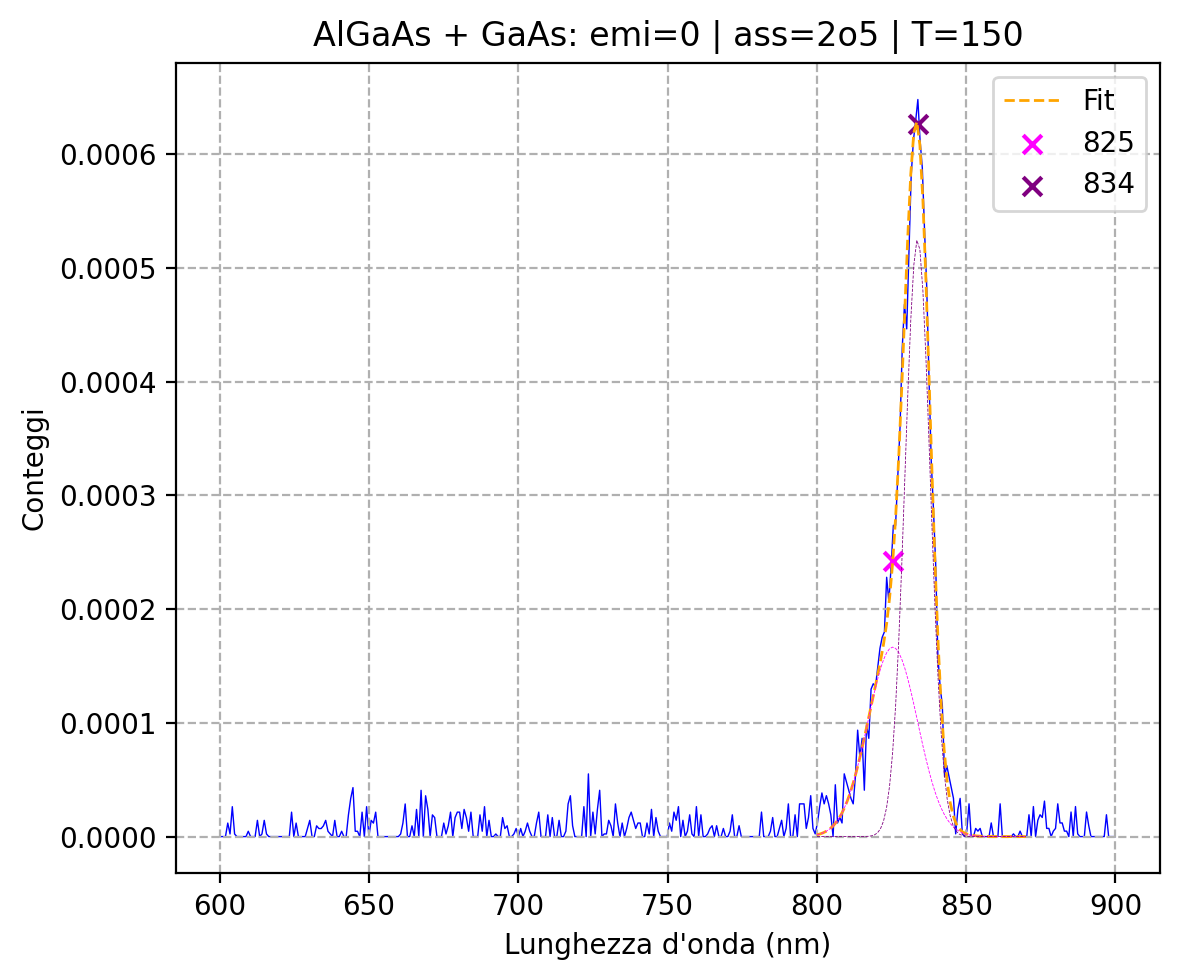

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.0001578186074573989
 - mu = 772.7495234204819 | 1.6044677233349136 eV
 - sigma = 10.898907151827352
• Gaussiana  2 [green]
 - A = 0.0007016825579251397
 - mu = 727.6801053961025 | 1.7038416460151868 eV
 - sigma = 6.985829985979388
 - chi2rid = 11.328706040394119
• Gaussiana  3 [magenta]
 - A = 0.0027538467534402936
 - mu = 819.1222049926114 | 1.5136345480486437 eV
 - sigma = 2.790292207274037
• Gaussiana  4 [purple]
 - A = 0.000549888900372999
 - mu = 829.1631838166718 | 1.4953047756456244 eV
 - sigma = 5.013945068932898
• Gaussiana  5 [peru]
 - A = 5.426159227070379e-05
 - mu = 838.7668466094219 | 1.4781839238907666 eV
 - sigma = 11.521102627661284
 - chi2rid = 22.220668423194954


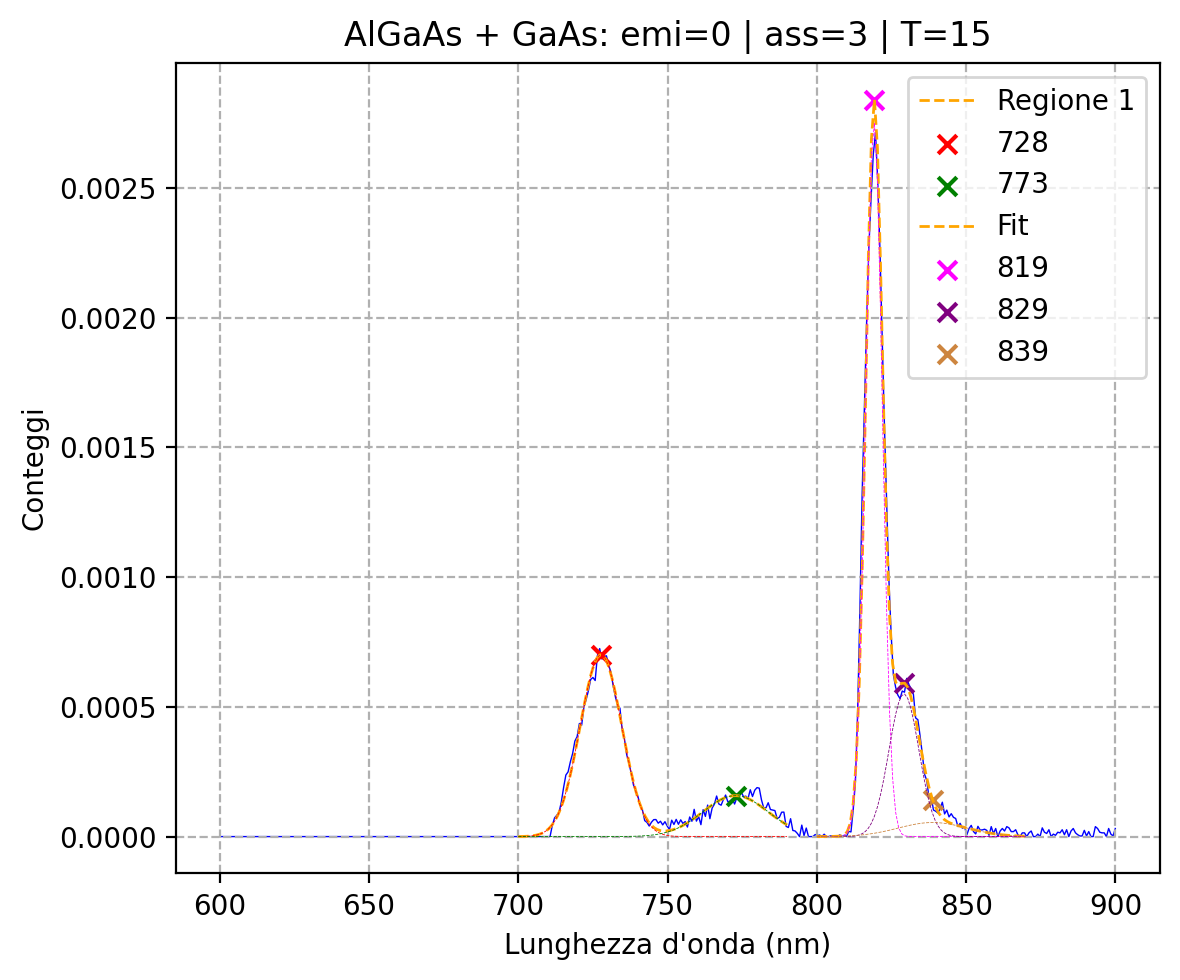

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.00034428142268873936
 - mu = 771.735638935553 | 1.6065756277119903 eV
 - sigma = 12.585807368923076
• Gaussiana  2 [green]
 - A = 0.00040387738730870976
 - mu = 732.5733235624566 | 1.6924608481800587 eV
 - sigma = 6.903284580727805
 - chi2rid = 14.691242639925445
• Gaussiana  3 [magenta]
 - A = 0.002384564675097012
 - mu = 819.0115468461862 | 1.5138390579778347 eV
 - sigma = 3.1118674312657832
• Gaussiana  4 [purple]
 - A = 0.00011338996212256213
 - mu = 827.7148240737765 | 1.497921303920115 eV
 - sigma = 11.729508438531358
 - chi2rid = 23.60890233824246


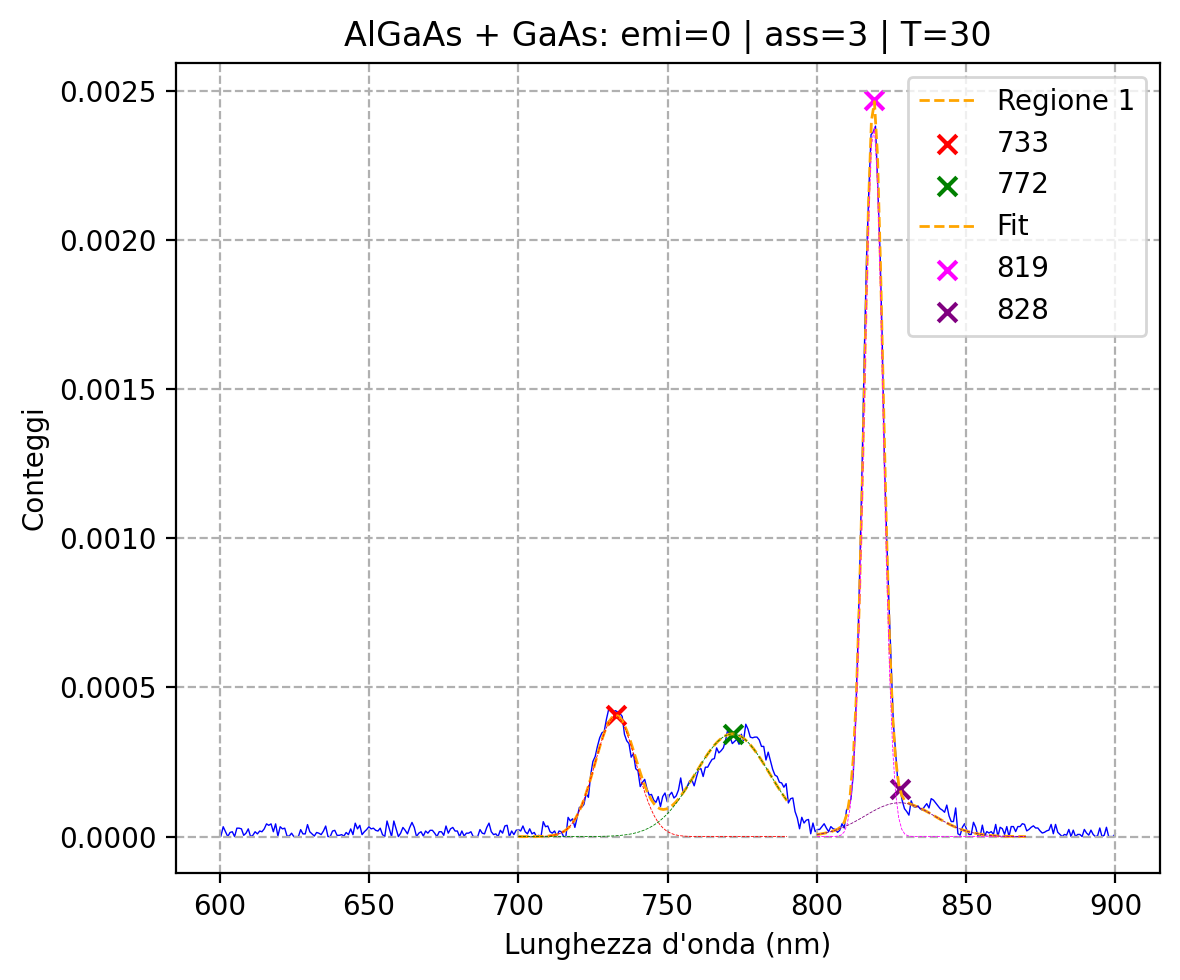

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.000406798416854776
 - mu = 777.3681535746695 | 1.594934990389347 eV
 - sigma = 8.670816819750561
• Gaussiana  2 [green]
 - A = 0.0001380197374901347
 - mu = 754.0626434315004 | 1.6442290031878883 eV
 - sigma = 14.300959509147289
 - chi2rid = 13.939885065237341
• Gaussiana  3 [magenta]
 - A = 0.0017380506346026078
 - mu = 819.2764549643152 | 1.5133495672161157 eV
 - sigma = 3.421599592677266
• Gaussiana  4 [purple]
 - A = 5.645041310290036e-05
 - mu = 824.926933603223 | 1.5029836195734507 eV
 - sigma = 9.412174546938907
 - chi2rid = 27.037890996228562


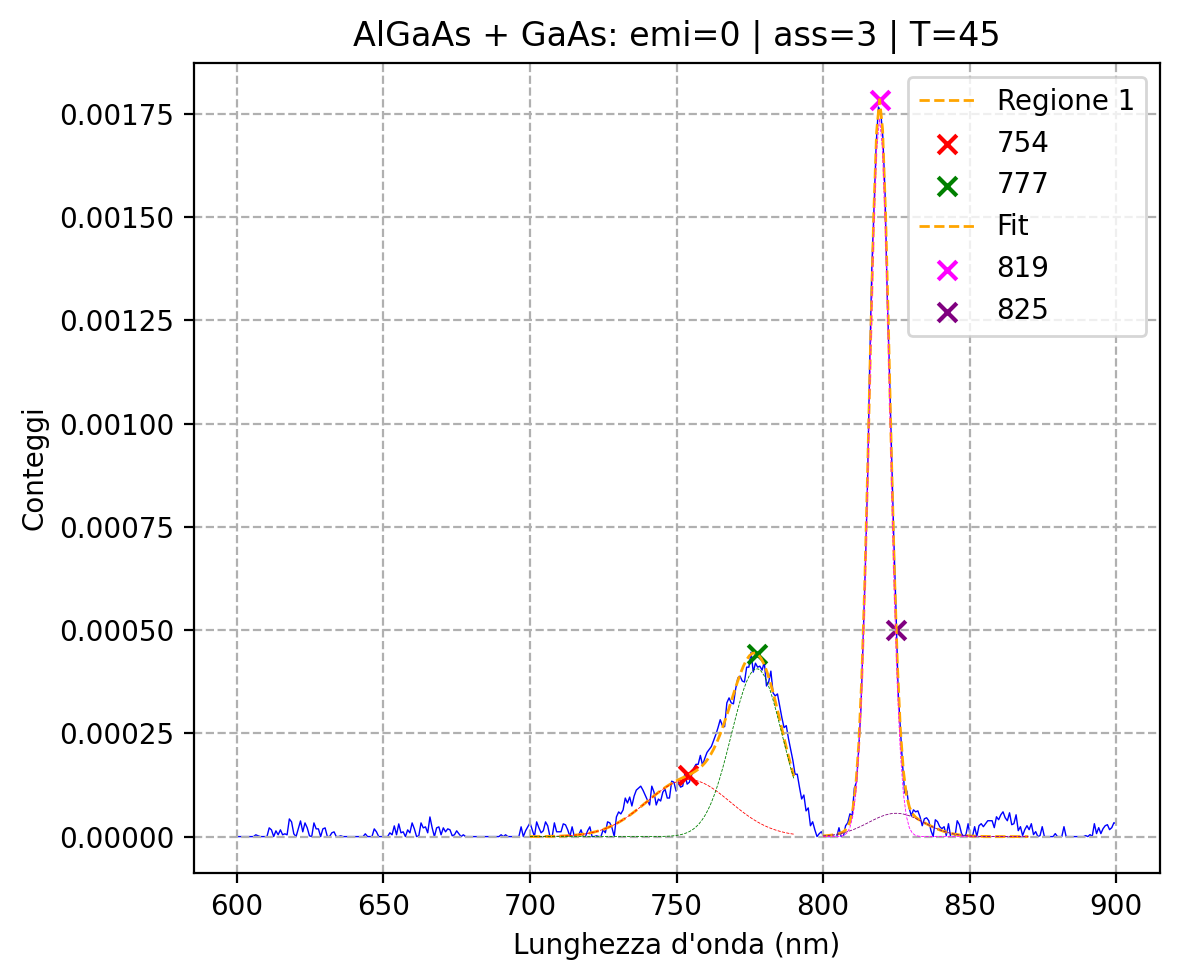

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.00017277143461780307
 - mu = 777.3359753891089 | 1.5950010134677877 eV
 - sigma = 11.07590997257489
 - chi2rid = 15.693857399176895
• Gaussiana  2 [magenta]
 - A = 0.0008910962011530113
 - mu = 821.239062802644 | 1.5097329446548196 eV
 - sigma = 3.205022358394545
• Gaussiana  3 [purple]
 - A = 0.00021626885585048806
 - mu = 818.4655030843577 | 1.514849024031268 eV
 - sigma = 6.496402008295266
 - chi2rid = 18.827026516860546


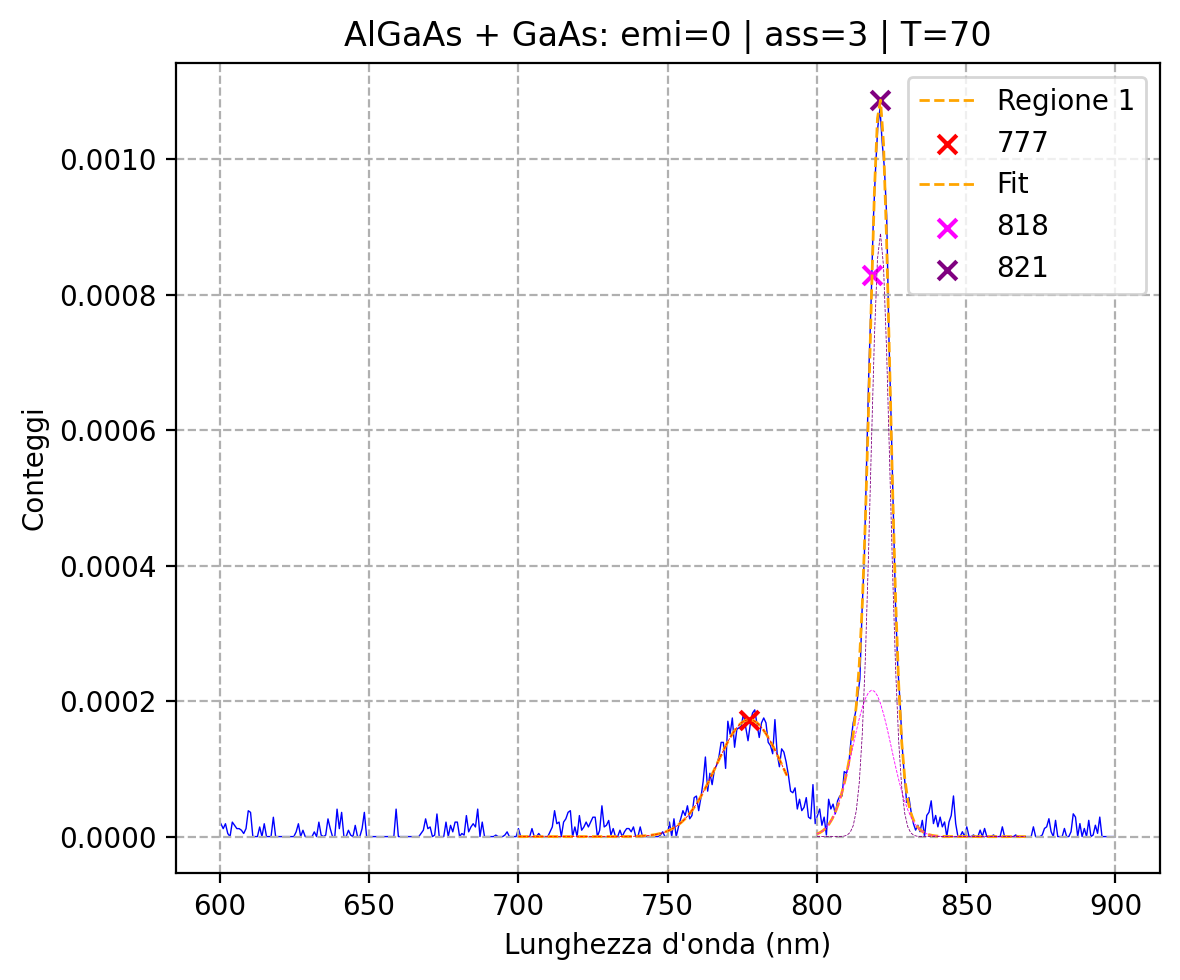

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 1.0563916284467836e-05
 - mu = 779.9999999999999 | 1.5895534212187181 eV
 - sigma = 6.39837875944763
 - chi2rid = 36.36859799344985
• Gaussiana  2 [magenta]
 - A = 0.0004656481340238341
 - mu = 825.0619134435559 | 1.5027377319792141 eV
 - sigma = 3.188185734872974
• Gaussiana  3 [purple]
 - A = 0.00014596621401585393
 - mu = 819.283401600271 | 1.513336735650754 eV
 - sigma = 4.863460209953705
 - chi2rid = 10.459003884526863


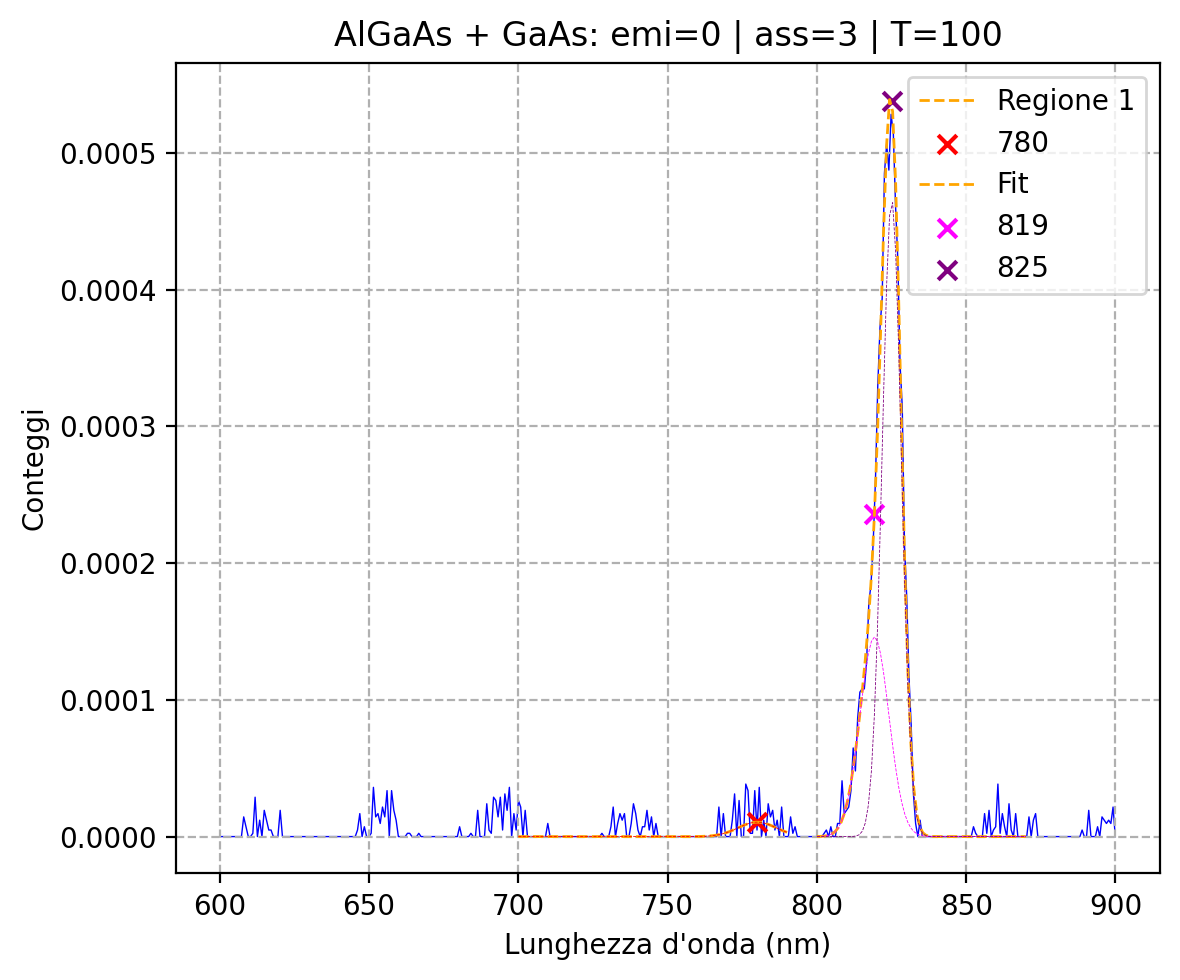

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 8.341552789879889e-05
 - mu = 832.8156264346343 | 1.4887468836992492 eV
 - sigma = 4.444274277754281
• Gaussiana  3 [purple]
 - A = 8.556782748133353e-06
 - mu = 800.0000000000001 | 1.5498145856882497 eV
 - sigma = 12.88258910008869
 - chi2rid = 11.849330555280979


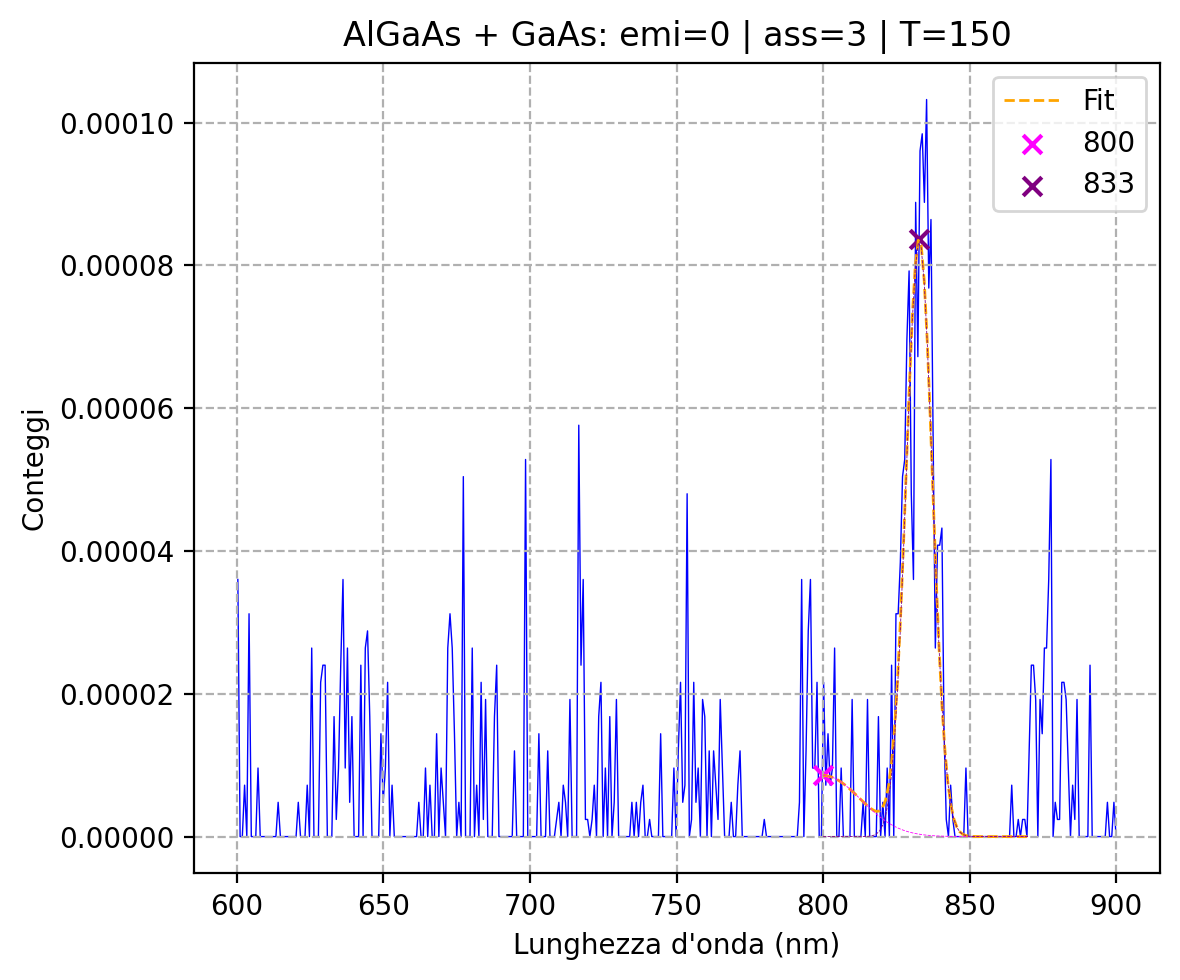

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.043288039014793854
 - mu = 725.9046260374997 | 1.7080090470267233 eV
 - sigma = 8.40290738009938
• Gaussiana  2 [green]
 - A = 0.013798439435300331
 - mu = 752.3288081306707 | 1.648018333408352 eV
 - sigma = 23.042441733797556
 - chi2rid = 366.44698727842797
• Gaussiana  3 [magenta]
 - A = 0.2583741476737762
 - mu = 817.8947782205568 | 1.5159060817677168 eV
 - sigma = 5.115370923161443
• Gaussiana  4 [purple]
 - A = 0.0344990256790505
 - mu = 831.5913906372433 | 1.4909385576978007 eV
 - sigma = 3.087367802075156
• Gaussiana  5 [peru]
 - A = 0.018187964098703435
 - mu = 812.659455677206 | 1.5256718664737687 eV
 - sigma = 16.839962932272755
 - chi2rid = 438.8084514867425


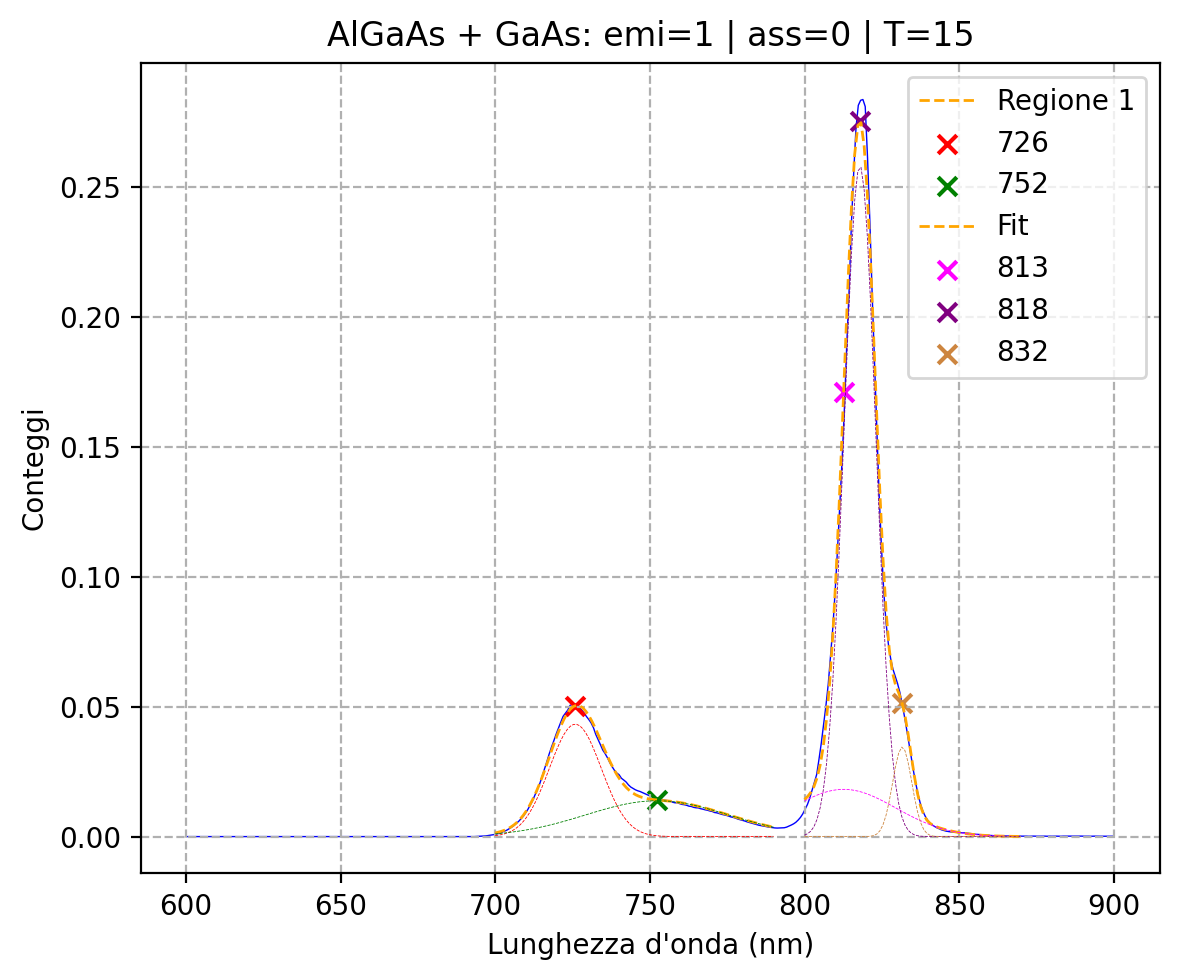

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.034066732816741344
 - mu = 726.4040495628199 | 1.7068347420375671 eV
 - sigma = 8.629877192737014
• Gaussiana  2 [green]
 - A = 0.013384095152326112
 - mu = 753.7456152748452 | 1.6449205719074085 eV
 - sigma = 23.662276138255947
 - chi2rid = 303.8228665003583
• Gaussiana  3 [magenta]
 - A = 0.22887616595776833
 - mu = 818.00872429948 | 1.5156949207508448 eV
 - sigma = 5.038583990712501
• Gaussiana  4 [purple]
 - A = 0.028167913961857517
 - mu = 815.8977584541276 | 1.5196164662833895 eV
 - sigma = 12.927786019966344
 - chi2rid = 375.9899044737378


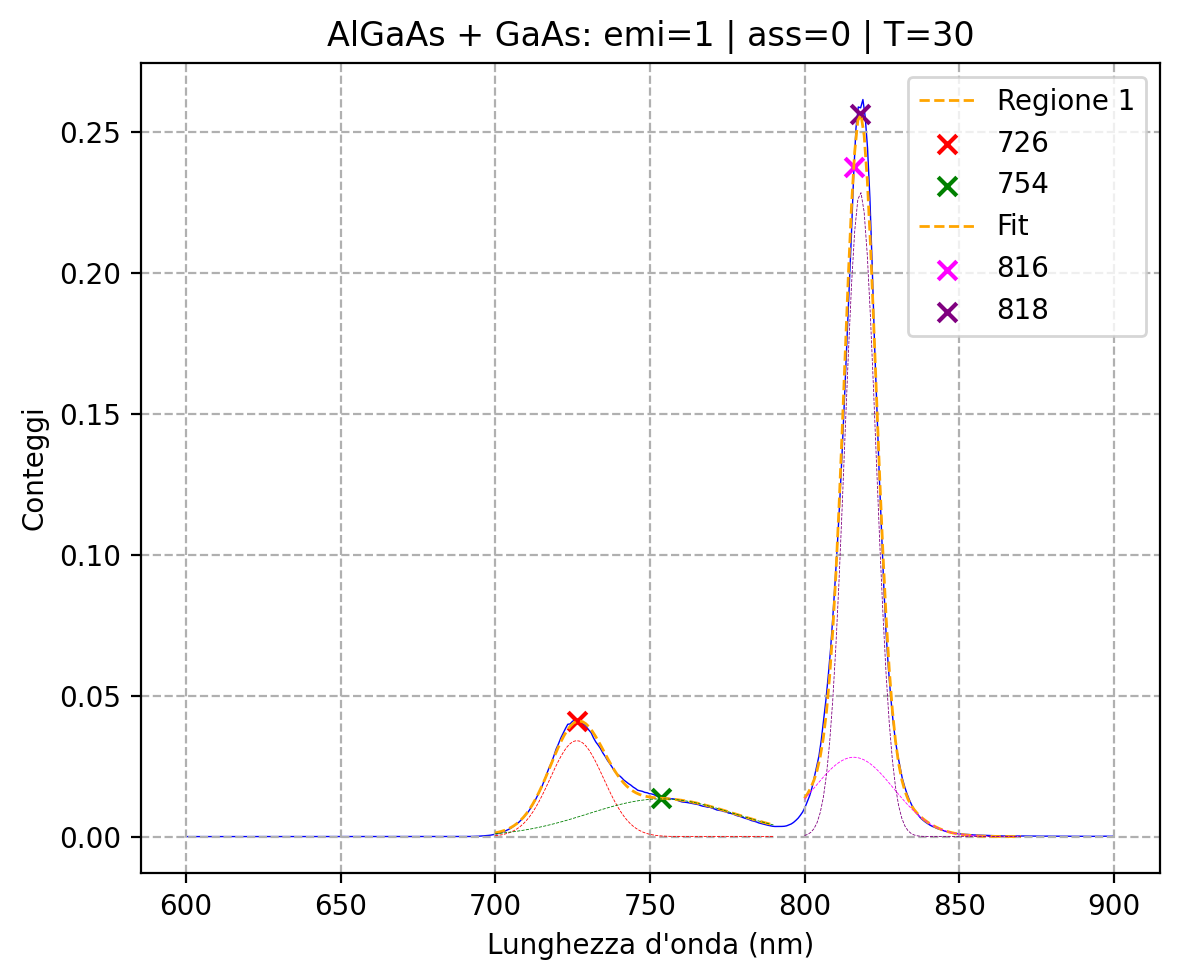

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.02660258838433348
 - mu = 727.8827993950866 | 1.703367176118174 eV
 - sigma = 8.706390227179103
• Gaussiana  2 [green]
 - A = 0.01356689777444951
 - mu = 755.0984863064144 | 1.6419734525165974 eV
 - sigma = 22.301682164427
 - chi2rid = 190.12508381192902
• Gaussiana  3 [magenta]
 - A = 0.21416411627105952
 - mu = 818.4932880037184 | 1.5147976003255474 eV
 - sigma = 5.162072450049435
• Gaussiana  4 [purple]
 - A = 0.01749831938523333
 - mu = 815.0405037610893 | 1.521214789730296 eV
 - sigma = 14.108340716076833
 - chi2rid = 300.5746305862641


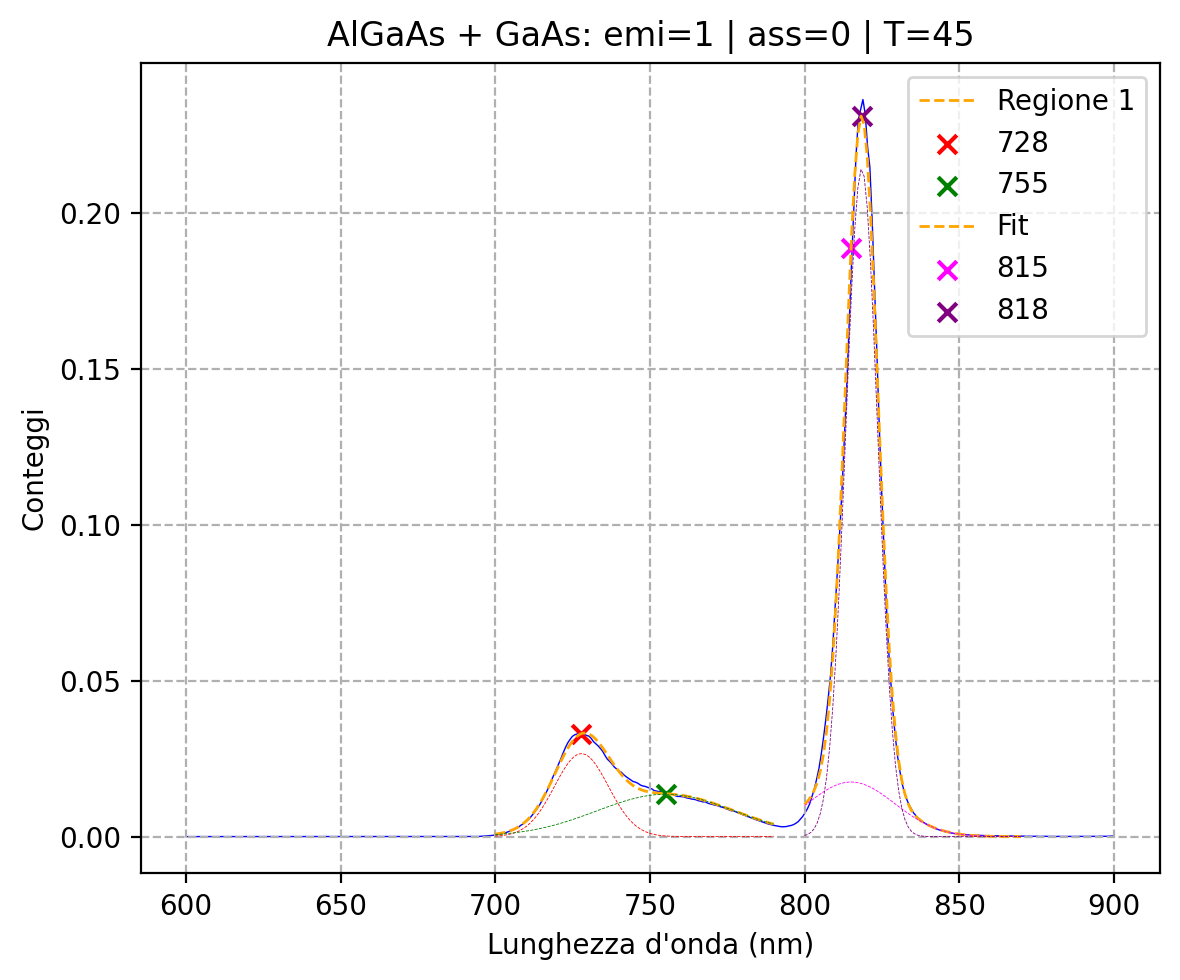

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.01117564537581181
 - mu = 755.0996443447011 | 1.6419709343481173 eV
 - sigma = 22.395066829740813
 - chi2rid = 679.2154593466523
• Gaussiana  2 [magenta]
 - A = 0.17526939609457806
 - mu = 820.1731292411415 | 1.5116950608925248 eV
 - sigma = 5.900464856736093
• Gaussiana  3 [purple]
 - A = 0.017206390706586597
 - mu = 814.6667663908797 | 1.5219126638040799 eV
 - sigma = 15.716874674335909
 - chi2rid = 299.6741541409069


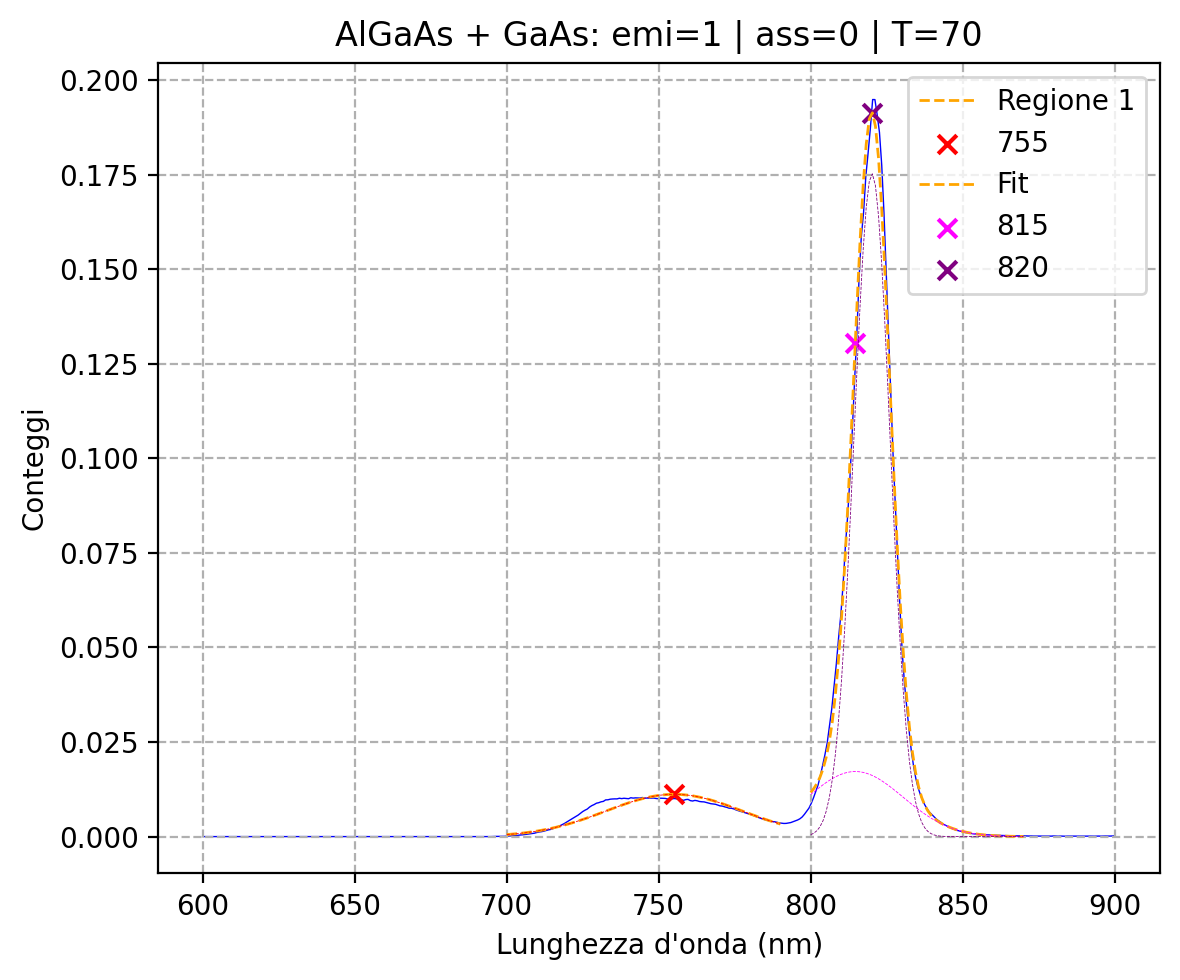

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  1 [red]
 - A = 0.004841584532590743
 - mu = 769.9999999999999 | 1.6101969721436364 eV
 - sigma = 22.23570951729764
 - chi2rid = 654.4447976652914
• Gaussiana  2 [magenta]
 - A = 0.16187892024261494
 - mu = 823.2899702812781 | 1.505972030883606 eV
 - sigma = 6.852735604629391
• Gaussiana  3 [purple]
 - A = 0.027428957559045692
 - mu = 816.3929539017137 | 1.518694720018207 eV
 - sigma = 15.955021183585977
 - chi2rid = 388.8600429460766


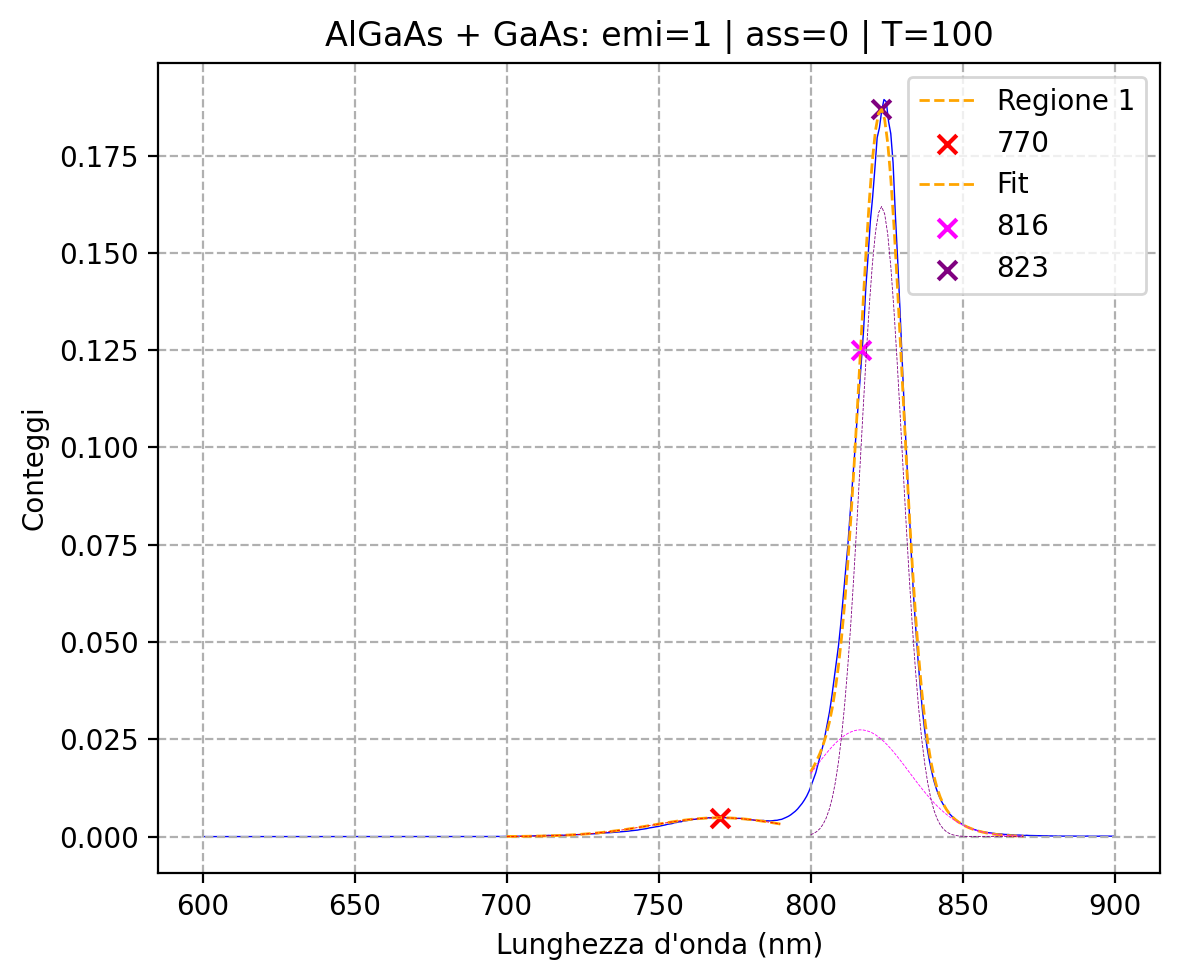

Nomi delle colonne: Index(['Wave', 'Sample', 'Dark', 'Reference', 'Scope Corrected for Dark'], dtype='object')
• Gaussiana  2 [magenta]
 - A = 0.061447102332453825
 - mu = 833.3968207471429 | 1.487708661330228 eV
 - sigma = 6.580228630644181
• Gaussiana  3 [purple]
 - A = 0.05059017097312958
 - mu = 826.3840840236257 | 1.5003334315368464 eV
 - sigma = 13.270423786292367
 - chi2rid = 154.8876970710667


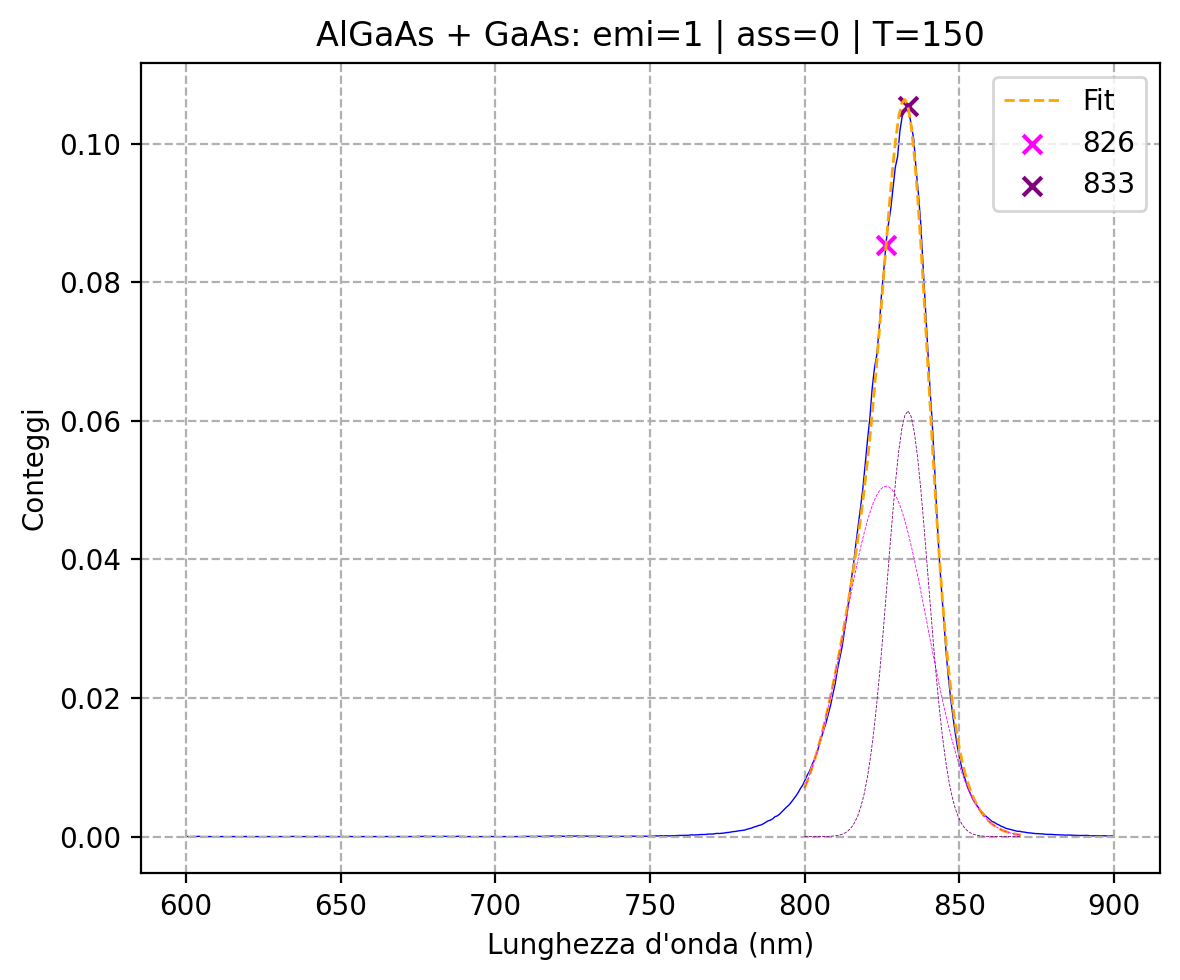

In [117]:
# Per ciascuno dei due valori di ass

raccoglitore_2 = {
    'ass=0': {
        'emi=0o5':  [],
        'emi=1':    [],
        'emi=1o5':  [],
        'emi=2':    [],
        'emi=2o5':  [],
        'emi=3':    []
    },
    'ass=1': {'emi=0': []}
}

picchi_in_eV = {}

for ass in d_o_ass:
    emi_list = d_o_emi[1:] if ass == '0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        arr_energia = []

        picchi_in_eV[(ass,emi)] = {}
        
        # Ciclo sulla temperatura
        for temp in arr_temperatura:
            try:
                nome_file = build_name(campione_2, emi, ass, temp, cartella='data/rampa_T/')
                waveln, counts = leggi_file_qd(nome_file)
                
            except FileNotFoundError:
                print(f"File non trovato: {nome_file}")
                continue
            
            picchi_in_eV[(ass,emi)][temp] = []
            
            # converto
            waveln = np.array(waveln)
            counts = np.array(counts)
            
            ## normalizzo i counts ##
            # creo vettore degli errori sui counts normalizzati (propagando errore)
            counts_sicuro = np.where(counts == 0, 1, counts)  
            err_counts = (np.sqrt(counts_sicuro)/conteggio_massimo_assoluto) / (np.sqrt(40*n_acq)) 
            # sul massimo count del plot attualmente considerato
            '''maximum = np.max(counts)
            counts = counts / maximum'''
            # sul massimo count di tutti i plot
            counts = counts / conteggio_massimo_assoluto 
            
            ## prendo il massimo dei counts normalizzati per impostare i bounds di A ##
            massimo_locale = np.max(counts)
            low_A = massimo_locale/50
            upp_A = 2*massimo_locale
            
            # Plot
            plt.figure(figsize=(6,5), dpi=200)
            plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
            
            ## ## ## ## # FIT # ## ## ## ##
            result = {}
            
            result['Regione 1'] = []

            # TODO: PASSARE I POPT DELLA REGIONE 1 AL FIT DELLE REGIONI INSIEME
            ## REGIONE 1 ##
            
            # isolo regione 700 < x < 800 [REGIONE 1]
            mask1 = (waveln > 700) & (waveln < 800)
            x_fit1 = waveln[mask1]
            y_fit1 = counts[mask1]
            err_counts1 = err_counts[mask1]
            
            # impostazione parametri: ogni entrata è una tripla (a, mu, sigma) [REGIONE 1]
            params1 = [
                (low_A, 730, 50) # il picco del bulk sempre presente
            ]
            
            '''# HACK: in emi=0 ass=1 T=70 devo forzare il fit di due gaussiane!
            if ass=='1' and emi=='0' and temp==70:
                params1 = [
                    (low_A, 730, 20), # il picco del bulk sempre presente
                    (low_A, 750, 20)  # l'altro
                ]'''
            
            # Set dei bounds [REGIONE 1]
            low1 = [low_A, 700, 1] * len(params1)  # Es: A >= 0, mu >= 1500, sigma >= 10 [0.007, inf, 4]
            upp1 = [upp_A, 790, 200] * len(params1)  # Limiti superiori
            
            # HACK: a 150 nella regione 1 non si vede niente: elimino i parametri (aiuta per dopo)
            if temp == 150:
                result['Regione 1'].append((np.nan, 0, np.nan, np.nan))
            else: # nella regione 1 a 150K non si vede nulla!
                
                if temp in (15, 30, 45):
                    max_gauss_regione_1 = 2
                elif temp in (70, 100):
                    params1 = [(low_A, 770, 20)]
                    low1 = [low_A, 750, 1]
                    if emi=='0' and ass=='1' and temp == 100: # HACK: a 100K riscontro un paio di problemi
                        low1 = [low_A, 750, 1]
                        upp1 = [upp_A, 770, 200]
                    elif emi=='3' and ass=='0' and temp == 100:
                        # HACK: qua provo a ri-settare tutto
                        mask1 = (waveln > 773) & (waveln < 785)
                        x_fit1 = waveln[mask1]
                        y_fit1 = counts[mask1]
                        err_counts1 = err_counts[mask1]
                        params1 = [(low_A, 778, 50)]
                        low1 = [low_A, 775, 1]
                        upp1 = [upp_A, 780, 200]
                        
                    max_gauss_regione_1 = 1
                    
                
                popt1, pcov1, chi2_reduced1 = fit_N_gaussiane(x_fit1, y_fit1, params1, 
                                                          bounds=(low1,upp1), 
                                                          N_MAX_GAUSS=max_gauss_regione_1,
                                                          n_acq=n_acq,
                                                          PREVENT_OVERFIT=False,
                                                          err_counts=err_counts1,
                                                          )
                
                # estraggo da popt i parametri ottimizzati [REGIONE 1]
                valori1 = [] # inizializzo
                for i in range(0, round(len(popt1)/3)):
                    valori1.append((popt1[3*i], popt1[3*i+1], popt1[3*i+2]))
                    
                # li imposto per la prossima gaussiana
                params1 = valori1
                
                # HACK: SE USI IL FIT DELLE REGIONI INSIEME QUESTO PLOT È RIDONDANTE
              
                ## PLOT CURVA FIT [REGIONE 1] ##
                x_plot1 = np.linspace(700, 790, 90)
                y_plot1 = N_gaussiane(x_plot1, *popt1)
                plt.plot(x_plot1, y_plot1, linestyle='--', color='orange', label=f"Regione 1", linewidth=1, zorder=2)
                
                # organizzo i picchi in ordine crescente [REGIONE 1]
                valori1 = sorted(valori1, key=lambda p: float(p[1]))
                n_picchi1 = len(valori1)
                
                # raccolta ordinata
                for i in range (n_picchi1):
                    result['Regione 1'].append((valori1[i][1], 0, valori1[i][2], valori1[i][0]))
                
                # plotto i picchi individuati dal fit [REGIONE 1]
                for i in range(n_picchi1): 
                    x_picco1 = valori1[i][1]
                    y_picco1 = N_gaussiane(x_picco1, *popt1)
                    plt.scatter(x_picco1, y_picco1, 
                                color=col[i], marker='x',
                                label=str(round(x_picco1)), # stampa nel plot le lambda dei picchi
                                s=45, #alpha=0-1 per opacità
                                #zorder=3
                                )
                
                # plotto singolarmente le gaussiane [REGIONE 1]
                for i in range(n_picchi1):
                    y_gauss1 = gaussiana(x_plot1, *valori1[i])
                    plt.plot(x_plot1, y_gauss1, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
                    
                ## PRINT RISULTATI FIT [REGIONE 1] ##
                for i in range(0, round(len(popt1)/3)):
                    print('• Gaussiana ', i+1, '[' + col[i] + ']')
                    print(' - A =', popt1[3*i])
                    print(' - mu =', popt1[3*i+1], '|', lambda_to_E(popt1[3*i+1]), 'eV')
                    print(' - sigma =', popt1[3*i+2])
                print(' - chi2rid =', chi2_reduced1)
          
            
            #------------#------------#------------#------------#------------#------------#------------
            ## REGIONE 2 ## #------------#------------#------------#------------#------------
            
            result['Regione 2'] = []
            
            # isolo regione 800 < x < 860 [REGIONE 2]
            mask2 = (waveln > 800) & (waveln < 870)
            x_fit2 = waveln[mask2]
            y_fit2 = counts[mask2]
            err_counts2 = err_counts[mask2]
            
            # impostazione parametri: ogni entrata è una tripla (a, mu, sigma) [REGIONE 2]
            params2 = [
                (upp_A, 810, 50) #
            ]
            
            # Set dei bounds
            low2 = [low_A, 800, 1] * len(params2)  
            upp2 = [upp_A, 870, 200] * len(params2)
            
            # Qui devo praticamente obbligarlo a usare 3 gaussiane a 15K
            if temp == 15:
                tolleranza2 = 0.5
                n_max_gauss_2 = 3
            elif temp == 150:
                tolleranza2 = 3
                n_max_gauss_2 = 2
            else:
                tolleranza2 = 3
                n_max_gauss_2 = 2
                
            popt2, pcov2, chi2_reduced2 = fit_N_gaussiane(x_fit2, y_fit2, params2, 
                                                          bounds=(low2,upp2),
                                                          N_MAX_GAUSS=n_max_gauss_2, # prima 3
                                                          n_acq=n_acq,
                                                          PREVENT_OVERFIT=False,
                                                          err_counts=err_counts2,
                                                          tolleranza=tolleranza2)
            
            # estraggo da popt i parametri ottimizzati [REGIONE 2]
            valori2 = [] # inizializzo
            for i in range(0, round(len(popt2)/3)):
                valori2.append((popt2[3*i], popt2[3*i+1], popt2[3*i+2]))
                
            # li imposto per la prossima gaussiana [REGIONE 2]
            params2 = valori2
            
            # HACK: SE USI IL FIT DELLE REGIONI INSIEME QUESTO PLOT È RIDONDANTE
    
            ## PLOT CURVA FIT [REGIONE 2] ##
            x_plot2 = np.linspace(800, 870, 70)
            y_plot2 = N_gaussiane(x_plot2, *popt2)
            plt.plot(x_plot2, y_plot2, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
            
            # FIXME: DEVONO ESSERE ORGANIZZATI PER ALTEZZA DEL PICCO, NON PER MEDIA
            # organizzo i picchi in ordine crescente [REGIONE 2]
            valori2 = sorted(valori2, key=lambda p: float(p[1]))
            n_picchi2 = len(valori2)
            
            
            # raccolta ordinata
            for i in range (n_picchi2):
                result['Regione 2'].append((valori2[i][1], 0, valori2[i][2], valori2[i][0]))
            
            
            # plotto i picchi individuati dal fit [REGIONE 2]
            for i in range(n_picchi2): 
                x_picco2 = valori2[i][1]
                y_picco2 = N_gaussiane(x_picco2, *popt2)
                plt.scatter(x_picco2, y_picco2, 
                            color=col[i+2], marker='x',
                            label=str(round(x_picco2)), # stampa nel plot le lambda dei picchi
                            s=45, #alpha=0-1 per opacità
                            #zorder=3
                            )
            
            # plotto singolarmente le gaussiane [REGIONE 2]
            for i in range(n_picchi2):
                y_gauss2 = gaussiana(x_plot2, *valori2[i])
                plt.plot(x_plot2, y_gauss2, linestyle='--', color=col[i+2], linewidth=0.3, zorder=2)
            
            ## PRINT RISULTATI FIT [REGIONE 1] ##
            for i in range(0, round(len(popt2)/3)):
                print('• Gaussiana ', i+1 +len(params1), '[' + col[i+2] + ']')
                print(' - A =', popt2[3*i])
                print(' - mu =', popt2[3*i+1], '|', lambda_to_E(popt2[3*i+1]), 'eV')
                print(' - sigma =', popt2[3*i+2])
            print(' - chi2rid =', chi2_reduced2)
           
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________
            # ___________________________________________________________________________________            
            
            ## RACCOLTA DEI PICCHI ##
            if ass == '1':
                raccoglitore_2['ass=1']['emi=0'].append(result)
            else:
                raccoglitore_2['ass=0']['emi='+emi].append(result)
            
    
            
            ## OPZIONI GRAFICHE ##
            # HACK: ho invertito emi e ass, vedo di sistemarla così: li inverto poi li ri-inverto
            help = emi
            emi = ass
            ass = help
        
            # Titolo e legenda
            plt.title(f"AlGaAs + GaAs: emi={emi} | ass={ass} | T={temp}")
            plt.xlabel("Lunghezza d'onda (nm)")
            plt.ylabel("Conteggi")
            plt.legend()
            plt.grid(linestyle='--')
            plt.tight_layout()
            plt.show()
            
            # ri-inverto
            ass = emi
            emi = help

            
    
            
            
            # per plottare curve tutte sovrapposte a ass=0, emi=1
            if ass=='1' and emi=='0':
                # converto in eV
                ene = lambda_to_E(waveln)
                # seleziono regione 
                mask_sovra = (ene > 1.45) & (ene < 1.85)
                x_sovra.append(ene[mask_sovra])
                y_sovra.append(counts[mask_sovra])

---

---

In [119]:
raccoglitore_2

{'ass=0': {'emi=0o5': [{'Regione 1': [(726.9784413055038,
      0,
      7.732650026008824,
      0.15732232744625513),
     (755.838829542905, 0, 19.42322254739204, 0.07977290399193687)],
    'Regione 2': [(818.391092571677, 0, 4.122603551347491, 0.947815360809658),
     (819.0085894096434, 0, 14.857775515759805, 0.03736592309895224),
     (831.2015755184594, 0, 3.2222005561175635, 0.12536748046183968)]},
   {'Regione 1': [(727.9701244614402,
      0,
      7.72105971012556,
      0.12650317695887905),
     (756.4839133005883, 0, 19.410464018192094, 0.0852891644275454)],
    'Regione 2': [(818.5408814088613,
      0,
      4.150432993705988,
      0.9011273326174625),
     (819.4391803451487, 0, 10.92253106191846, 0.07245483074485902)]},
   {'Regione 1': [(730.0708569575091,
      0,
      7.758669560385633,
      0.06395964654378426),
     (758.6808183691554, 0, 18.834347858099825, 0.07237394047039197)],
    'Regione 2': [(817.7417044736111,
      0,
      13.2038847268358,
      0.0

---

---

## Plotto le regioni QD in eV per emi=1 ass=0

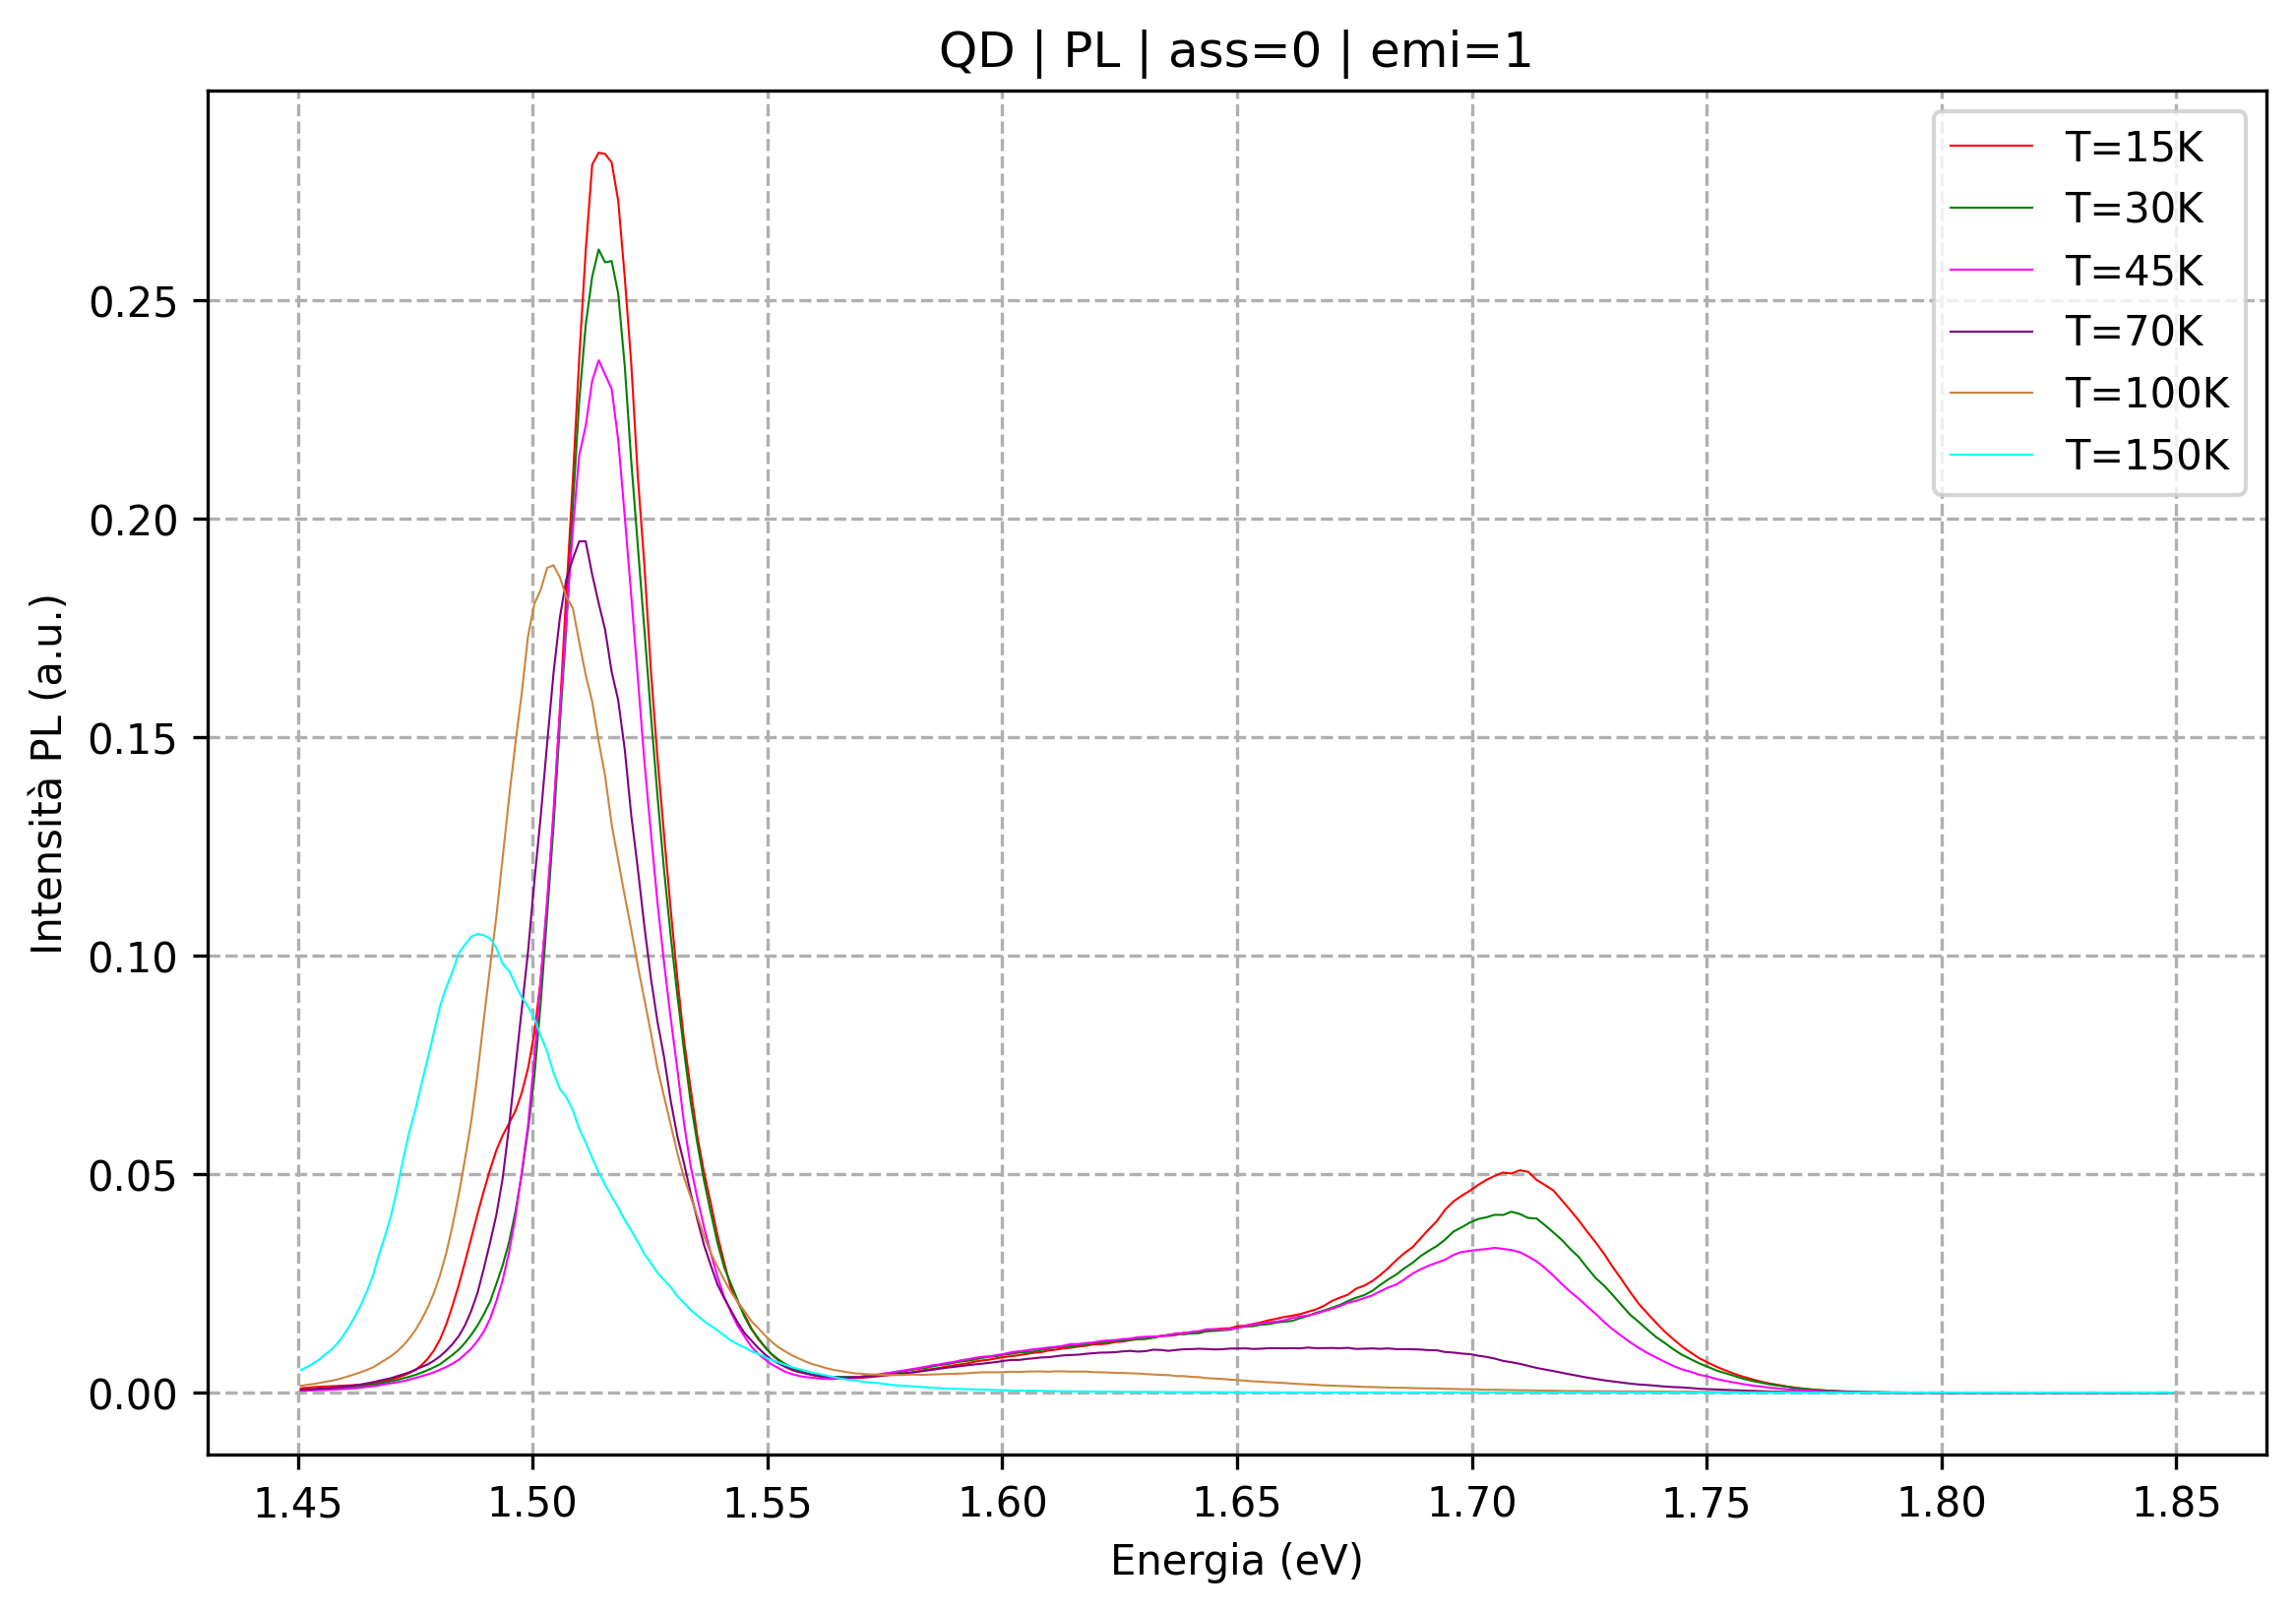

In [120]:
### Plot gaussiane al variare di T per ass=0 emi=1
plt.figure(figsize=(9, 6), dpi=300)

i=0

# per ogni temperatura, estraggo sigma e a corrispondenti a ass=0 emi=1 e plotto la gaussiana 
for x, y in zip(x_sovra,y_sovra):
    if len(y) > 0:
        plt.plot(x, y, linestyle='-', color=col[i], linewidth=0.5, label='T='+str(arr_temperatura[i])+'K')
    i+=1
# Aggiungere etichette e legenda
plt.title('QD | PL | ass=0 | emi=1')
plt.xlabel('Energia (eV)')
plt.ylabel('Intensità PL (a.u.)')
plt.grid(linestyle='--')
plt.legend()

# Mostrare il grafico
plt.show()

---

---